# MACHINE LEARNING PROJECT

## C2C E-Commerce Website Sales Prediction

We are a team of 6 Data Scientists, attached to the business unit in charge of marketing and customer retention of the company Vestaire Collective.

We have a dataset, which consists on collected data from more than 98.000 users, about different types of metrics. 

We will explore these datas with data vizualisation, study of correlations between them, and apply machine learning models on it in order to predict behaviours, classify types of users and orient our main marketing strategy.

<p style= 'color: navy; background: #FF5A28 ; text-align: center; padding: 15px; border-radius: 10px;font-size: 20px; font-weight: bold'> Part 1: C2C User Behaviour and Segementation</h1> 


- Step 1: Import Data
- Step 2: Data Cleaning
- Step 3: Exploratory Analysis
- Step 4: Cluster Analysis

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Step 1: Import Data

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_seg=pd.read_csv('6M-0K-99K.users.dataset.public.csv')

In [3]:
df_seg['language']=df_seg['language'].str.upper()
df_seg.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,EN,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,EN,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,FR,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,EN,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,EN,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [4]:
df_seg.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,-6.692039e+15,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,1.773993,581.291236,3063.771870,102.125583,8.510424
std,5.330807e+18,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,0.428679,208.855888,168.298621,5.609735,0.467863
min,-9.223101e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.622895e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,572.000000,2857.000000,95.230000,7.940000
50%,-1.337989e+15,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,694.000000,3196.000000,106.530000,8.880000
75%,4.616388e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,702.000000,3201.000000,106.700000,8.890000
max,9.223331e+18,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


In [5]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>Step 2: Data cleaning


- Since the User's account identity details like 'IdentifierHash' is useless here, we gonna drop this feature.
- Also the value of the ‘type’ column are all ‘user’, it’s useless so we gonna drop this column too.
- We drop the ‘country’ column so as to eliminate unwanted duplicate values since there is already a ‘countryCode’ column.
- ‘CivilityGenderId’ and ‘civilityTitile’ are duplicates of Gender so we drop the first two columns.
- We don't need that many seniority columns so we retain the most representative value: the ‘seniorityAsYears’ column.

In [6]:
df_seg1=df_seg.copy()
df_seg1=df_seg1.drop(['identifierHash','type','country','civilityGenderId','civilityTitle','seniority','seniorityAsMonths'],axis=1)
df_seg1.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsYears,countryCode
0,EN,147,10,77,26,174,74.0,104,1,M,True,False,True,True,11,8.88,gb
1,EN,167,8,2,19,170,99.0,0,0,F,True,False,True,True,12,8.90,mc
2,FR,137,13,60,33,163,94.0,10,3,F,True,False,True,False,11,8.90,fr
3,EN,131,10,14,122,152,92.0,7,0,F,True,False,True,False,12,8.88,us
4,EN,167,8,0,25,125,100.0,0,0,F,False,False,False,True,22,7.93,us


In [7]:
df_seg1.isna().any()

language               False
socialNbFollowers      False
socialNbFollows        False
socialProductsLiked    False
productsListed         False
productsSold           False
productsPassRate       False
productsWished         False
productsBought         False
gender                 False
hasAnyApp              False
hasAndroidApp          False
hasIosApp              False
hasProfilePicture      False
daysSinceLastLogin     False
seniorityAsYears       False
countryCode            False
dtype: bool

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>Step 3: Exploratory Analysis

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Univariate Analysis

#### (1) Language
- We performed univariate analysis on the cleaned data in sequence, starting with the 'language' column.
- The grouping statistical results and distribution histofram of 'language' are as follows:
- We could see that on this platform, the users who use English as the operating language are the most, followed by French users and Italian users.

In [8]:
df_seg1["language"].value_counts()

EN    51564
FR    26372
IT     7766
DE     7178
ES     6033
Name: language, dtype: int64

<AxesSubplot:>

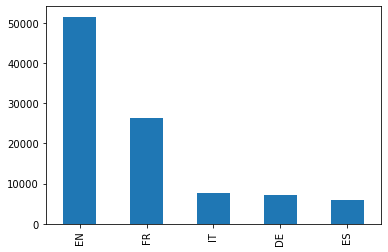

In [9]:
df_seg1["language"].value_counts().plot(kind='bar')

#### (2) Gender
- The grouping statistical results and distribution histofram of 'gender' are as follows:
- We can see that the platform has a majority of female users, and the number of female users is 3.5 times that of male users.

In [10]:
df_seg1["gender"].value_counts()

F    76121
M    22792
Name: gender, dtype: int64

<AxesSubplot:>

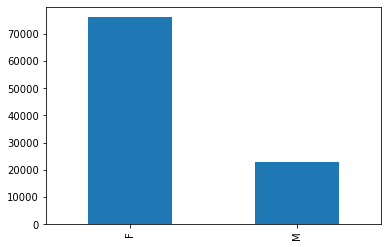

In [11]:
df_seg1["gender"].value_counts().plot(kind='bar')

#### (3) Country
- We counted the top ten countries.
- We can see that France has the largest number of users on this platform, followed by the United States and Royale Uni.

fr    25135
us    20602
gb    11310
it     8015
de     6567
      ...  
vu        1
an        1
aq        1
ly        1
pw        1
Name: countryCode, Length: 199, dtype: int64


Text(0, 0.5, '')

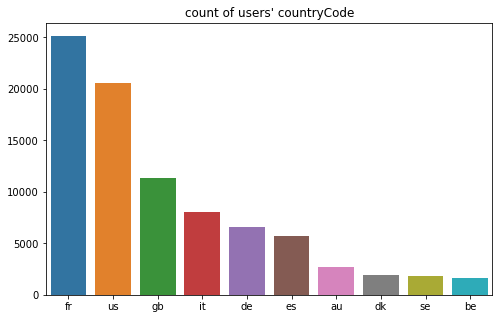

In [12]:
vc_Country = df_seg1["countryCode"].value_counts()
print(vc_Country)
plt.figure(figsize=(8, 5) )
plt.title("count of users' countryCode")
sns.barplot(x=vc_Country[:10].index, y=vc_Country[:10] ) 
plt.ylabel("")

#### (4) App
- We compared users who has anyapp with who doesn't have any and plot the propotion.
- About 26.5% of users have downloaded the app and 73.5% haven't.

count     98913
unique        2
top       False
freq      72739
Name: hasAnyApp, dtype: object
has Any App    26174
has no App     72739
dtype: int64


<AxesSubplot:title={'center':'count of users who has or not has any App'}, ylabel='None'>

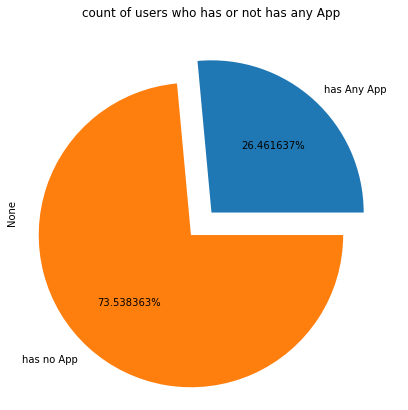

In [13]:
print(df_seg1['hasAnyApp'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )

df_seg1_hasAnyApp = pd.Series({
    'has Any App': df_seg1['hasAnyApp'][df_seg1['hasAnyApp'] == True].count(),
    'has no App':  df_seg1['hasAnyApp'][df_seg1['hasAnyApp'] == False].count()
    })
print(df_seg1_hasAnyApp)

plt.figure(figsize=(7,7) )
plt.title("count of users who has or not has any App")
df_seg1_hasAnyApp.plot.pie(labels= df_seg1_hasAnyApp.index, autopct='%0f%%', explode=(0, 0.2) )

#### (5) Profile Picture
- We compared users who has profileimage with who doesn't have and plot the propotion.
- We could see that most of the users(98.1%) have uploaded their profile picture, only a small portion of users(1.9%) haven't.

count     98913
unique        2
top        True
freq      97018
Name: hasProfilePicture, dtype: object
has Profile Picture       97018
has no Profile Picture     1895
dtype: int64


<AxesSubplot:title={'center':'count of users who has profile picture'}, ylabel='None'>

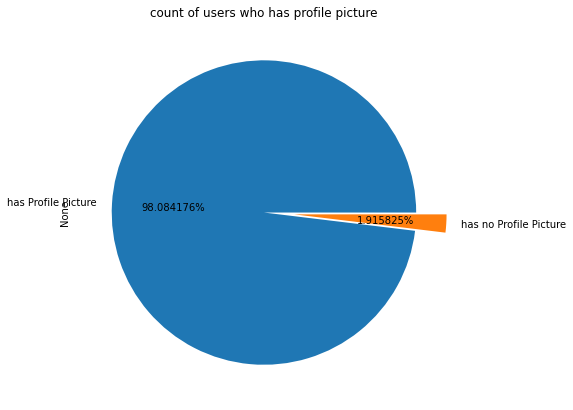

In [14]:
print(df_seg1['hasProfilePicture'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )

df_seg1_hasProfilePicture = pd.Series({
    'has Profile Picture': df_seg1['hasProfilePicture'][df_seg1['hasProfilePicture'] == True].count(),
    'has no Profile Picture':  df_seg1['hasProfilePicture'][df_seg1['hasProfilePicture'] == False].count()
    })
print(df_seg1_hasProfilePicture)

plt.figure(figsize=(7,7) )
plt.title("count of users who has profile picture")
df_seg1_hasProfilePicture.plot.pie(labels= df_seg1_hasProfilePicture.index, autopct='%0f%%', explode=(0, 0.2) )

#### (6) Products Sold
- We have made statistics on the sales of products by users.
- 96877 users have never sold products, accounting for 97.9% of the total users of the platform.
- 917 users have only sold one product, accounting for 0.93% of the total.
- The remaining 1119 users have sold more than one product, accounting for 1.13% of the total.

count    98913.000000
mean         0.121592
std          2.126895
min          0.000000
0%           0.000000
20%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
80%          0.000000
max        174.000000
Name: productsSold, dtype: float64
0 productsSold     96877
1 productsSold       917
>1 productsSold     1119
dtype: int64


Text(0, 0.5, '')

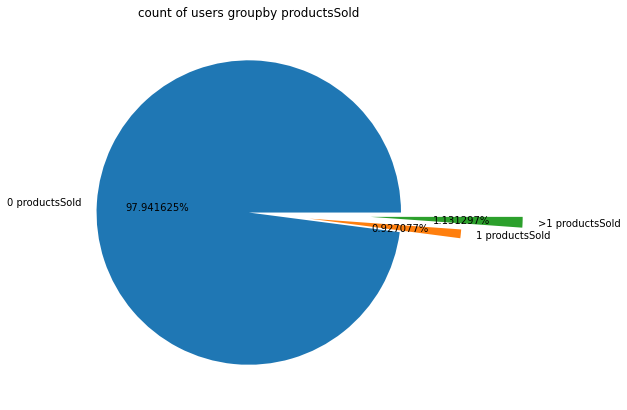

In [15]:
print(df_seg1['productsSold'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )

df_seg1_productsSold = pd.Series({
    '0 productsSold': df_seg1['productsSold'][df_seg1['productsSold'] == 0].count(),
    '1 productsSold': df_seg1['productsSold'][df_seg1['productsSold'] == 1].count(),
    '>1 productsSold': df_seg1['productsSold'][df_seg1['productsSold'] > 1].count()
    })
print(df_seg1_productsSold)

plt.figure(figsize=(7,7) )
plt.title("count of users groupby productsSold")
df_seg1_productsSold.plot.pie(labels= df_seg1_productsSold.index, autopct='%0f%%', explode=(0, 0.4, 0.8) )
plt.ylabel("")

#### (6) Products Bought
- 93494 users have never bought products, accounting for 94.5% of the total users of the platform.
- 3297 users have only bought one product, accounting for 3.33% of the total.
- The remaining 2122 users have bought more than one product, accounting for 2.15% of the total.

count    98913.000000
mean         0.171929
std          2.332266
min          0.000000
0%           0.000000
20%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
80%          0.000000
max        405.000000
Name: productsBought, dtype: float64
0 productsBought     93494
1 productsBought      3297
>1 productsBought     2122
dtype: int64


Text(0, 0.5, '')

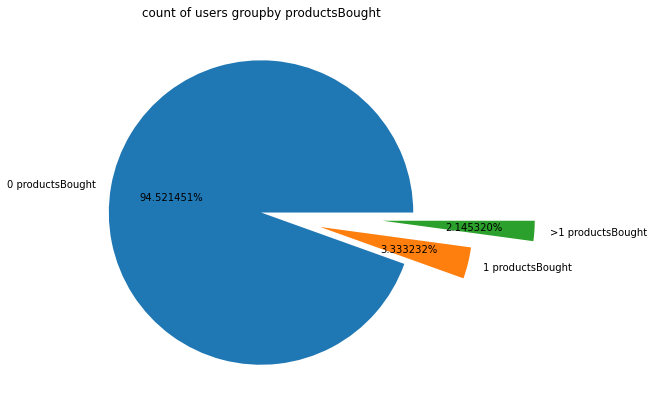

In [16]:
print(df_seg1['productsBought'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )

df_seg1_productsBought = pd.Series({
    '0 productsBought': df_seg1['productsBought'][df_seg1['productsBought'] == 0].count(),
    '1 productsBought': df_seg1['productsBought'][df_seg1['productsBought'] == 1].count(),
    '>1 productsBought': df_seg1['productsBought'][df_seg1['productsBought'] > 1].count()
    })
print(df_seg1_productsBought)

plt.figure(figsize=(7,7) )
plt.title("count of users groupby productsBought")
df_seg1_productsBought.plot.pie(labels= df_seg1_productsBought.index, autopct='%0f%%', explode=(0, 0.4, 0.8) )
plt.ylabel("")

#### (7) Number of Followers
- Count users who have 0 followers, 1-10 followers and >10 followers and plot the distribution.
- Every users on this platform has social followers.
- Most of the users have 0 to 10 followers, and only 0.96% of the users have more than 10 folowers.

count    98913.000000
mean         3.432269
std          3.882383
min          3.000000
0%           3.000000
20%          3.000000
40%          3.000000
50%          3.000000
60%          3.000000
80%          3.000000
max        744.000000
Name: socialNbFollowers, dtype: float64
0 social Followers           0
1-10 social Followers    97965
>10 social Followers       948
dtype: int64


Text(0, 0.5, '')

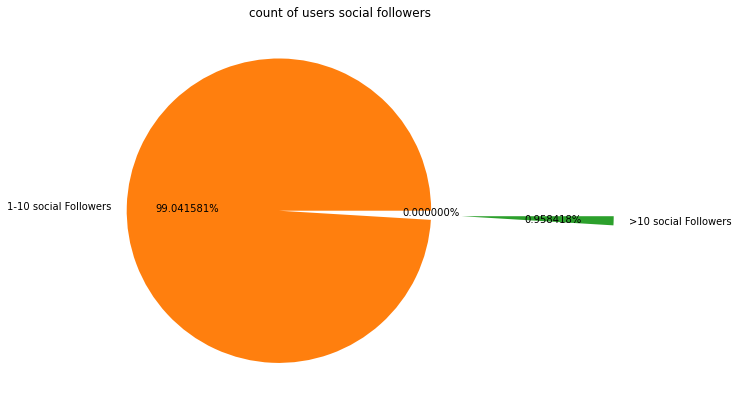

In [17]:
print(df_seg1['socialNbFollowers'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )

df_seg1_socialNbFollowers = pd.Series({
    '0 social Followers': df_seg1['socialNbFollowers'][df_seg1['socialNbFollowers'] == 0].count(),
    '1-10 social Followers': df_seg1['socialNbFollowers'][(df_seg1['socialNbFollowers'] > 0) & (df_seg1['socialNbFollowers'] <= 10) ].count(),
    '>10 social Followers': df_seg1['socialNbFollowers'][df_seg1['socialNbFollowers'] > 10].count()
    })
print(df_seg1_socialNbFollowers)

plt.figure(figsize=(7,7) )
plt.title("count of users social followers")
df_seg1_socialNbFollowers.plot.pie(labels= df_seg1_socialNbFollowers.index, autopct='%0f%%', explode=(0, 0.4, 0.8) )
plt.ylabel("")

#### (7) Number of Follows
- Count users who have 0 follows, 1-10 follows and >10 follows and plot the distribution
- Most of the users follows 1-10 accounts, only a samll portion of user have zero follow or follow over 10 accounts.

count    98913.000000
mean         8.425677
std         52.839572
min          0.000000
0%           0.000000
20%          8.000000
40%          8.000000
50%          8.000000
60%          8.000000
80%          8.000000
max      13764.000000
Name: socialNbFollows, dtype: float64
0 social Follows          39
1-10 social Follows    97997
>10 social Follows       877
dtype: int64


Text(0, 0.5, '')

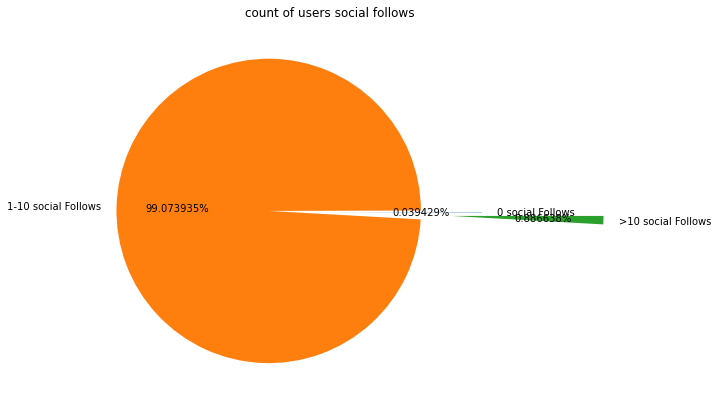

In [18]:
print(df_seg1['socialNbFollows'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )

df_seg1_socialNbFollows = pd.Series({
    '0 social Follows': df_seg1['socialNbFollows'][df_seg1['socialNbFollows'] == 0].count(),
    '1-10 social Follows': df_seg1['socialNbFollows'][(df_seg1['socialNbFollows'] > 0) & (df_seg1['socialNbFollows'] <= 10) ].count(),
    '>10 social Follows': df_seg1['socialNbFollows'][df_seg1['socialNbFollows'] > 10].count()
    })
print(df_seg1_socialNbFollows)

plt.figure(figsize=(7,7) )
plt.title("count of users social follows")
df_seg1_socialNbFollows.plot.pie(labels= df_seg1_socialNbFollows.index, autopct='%0f%%', explode=(0, 0.4, 0.8) )
plt.ylabel("")

#### (8) Days Since Last Login
- Here hows the density of 'daysSinceLastLogin' among all of the users.
- The min days of last login is 11 days.
- The mean of 'daysSinceLstLogin' is 581 days. This shows that the user activity of this platform is not very high.

count    98913.000000
mean       581.291236
std        208.855888
min         11.000000
0%          11.000000
20%        443.000000
40%        691.000000
50%        694.000000
60%        697.000000
80%        703.000000
max        709.000000
Name: daysSinceLastLogin, dtype: float64


/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 504x504 with 0 Axes>

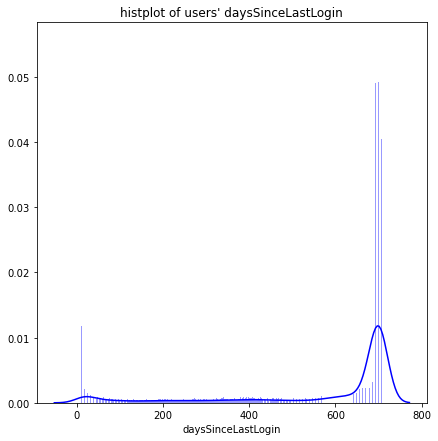

<Figure size 504x504 with 0 Axes>

In [19]:
print(df_seg1['daysSinceLastLogin'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )

plt.figure(figsize=(7,7) )
plt.title("histplot of users' daysSinceLastLogin")
sns.distplot(df_seg1['daysSinceLastLogin'], color='b', bins=1000, hist_kws={'alpha': 0.4});
plt.ylabel("")
plt.figure(figsize=(7,7) )

#### (9) Seniority as Years
- Here hows the density of 'seniorityAsYears' among all of the users.
- Users have an average of 8 years of platform use time, which is a very considerable number.

count    98913.000000
mean         8.510424
std          0.467863
min          7.920000
0%           7.920000
20%          7.930000
40%          8.880000
50%          8.880000
60%          8.880000
80%          8.890000
max          8.900000
Name: seniorityAsYears, dtype: float64


/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 504x504 with 0 Axes>

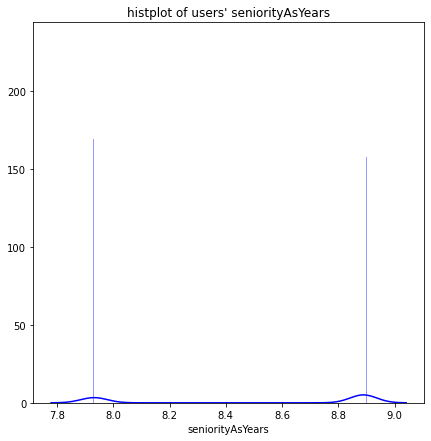

<Figure size 504x504 with 0 Axes>

In [20]:
print(df_seg1['seniorityAsYears'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )

plt.figure(figsize=(7,7) )
plt.title("histplot of users' seniorityAsYears")
sns.distplot(df_seg1['seniorityAsYears'], color='b', bins=1000, hist_kws={'alpha': 0.4});
plt.ylabel("")
plt.figure(figsize=(7,7) )

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Multivariate Analysis

- First of all, we need to encode categorical variables.
- Categorical variables of the dataset are shown at the followed table:

In [21]:
df_categorical = df_seg1[['language','gender','hasAnyApp','hasAndroidApp','hasIosApp','hasProfilePicture','countryCode']]
df_categorical.head()

,language,gender,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,countryCode
0,EN,M,True,False,True,True,gb
1,EN,F,True,False,True,True,mc
2,FR,F,True,False,True,False,fr
3,EN,F,True,False,True,False,us
4,EN,F,False,False,False,True,us


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
language_encoded = encoder.fit_transform(df_categorical['language'])
gender_encoded= encoder.fit_transform(df_categorical['gender'])
hasAnyApp_encoded= encoder.fit_transform(df_categorical['hasAnyApp'])
hasAndroidApp_encoded= encoder.fit_transform(df_categorical['hasAndroidApp'])
hasIosApp_encoded= encoder.fit_transform(df_categorical['hasIosApp'])
hasProfilePicture_encoded= encoder.fit_transform(df_categorical['hasProfilePicture'])
countryCode_encoded= encoder.fit_transform(df_categorical['countryCode'])

language_encoded = pd.DataFrame(language_encoded, columns=['language_encoded'])
gender_encoded=pd.DataFrame(gender_encoded, columns=['gender_encoded'])
hasAnyApp_encoded=pd.DataFrame(hasAnyApp_encoded, columns=['hasAnyApp_encoded'])
hasAndroidApp_encoded=pd.DataFrame(hasAndroidApp_encoded, columns=['hasAndroidApp_encoded'])
hasIosApp_encoded=pd.DataFrame(hasIosApp_encoded, columns=['hasIosApp_encoded'])
hasProfilePicture_encoded=pd.DataFrame(hasProfilePicture_encoded, columns=['hasProfilePicture_encoded'])
countryCode_encoded=pd.DataFrame(countryCode_encoded, columns=['countryCode_encoded'])

df_seg_lab = pd.concat([df_seg1,language_encoded, gender_encoded, hasAnyApp_encoded, hasAndroidApp_encoded, hasIosApp_encoded,hasProfilePicture_encoded,countryCode_encoded], axis=1)
df_seg_lab.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,...,daysSinceLastLogin,seniorityAsYears,countryCode,language_encoded,gender_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded,countryCode_encoded
0,EN,147,10,77,26,174,74.0,104,1,M,...,11,8.88,gb,1,1,1,0,1,1,66
1,EN,167,8,2,19,170,99.0,0,0,F,...,12,8.90,mc,1,0,1,0,1,1,119
2,FR,137,13,60,33,163,94.0,10,3,F,...,11,8.90,fr,3,0,1,0,1,0,64
3,EN,131,10,14,122,152,92.0,7,0,F,...,12,8.88,us,1,0,1,0,1,0,185
4,EN,167,8,0,25,125,100.0,0,0,F,...,22,7.93,us,1,0,0,0,0,1,185


#### (1) Correlation Overview
- Then we plot the whole correlation matrix and explore the related variables

In [23]:
df_seg_lab.corr()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,hasAnyApp,hasAndroidApp,...,hasProfilePicture,daysSinceLastLogin,seniorityAsYears,language_encoded,gender_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded,countryCode_encoded
socialNbFollowers,1.000000,0.702766,0.653540,0.343603,0.627167,0.351293,0.334733,0.147573,0.088570,0.027360,...,-0.286141,-0.159292,0.006030,0.013255,-0.007360,0.088570,0.027360,0.084025,-0.286141,-0.007755
socialNbFollows,0.702766,1.000000,0.809462,0.091306,0.175296,0.055519,0.266589,0.006406,0.011264,0.001590,...,-0.041700,-0.019811,0.004168,0.008061,-0.001672,0.011264,0.001590,0.011391,-0.041700,-0.001141
socialProductsLiked,0.653540,0.809462,1.000000,0.044845,0.181755,0.059395,0.349138,0.064741,0.027030,0.006367,...,-0.063859,-0.055166,-0.000977,0.001552,-0.004919,0.027030,0.006367,0.026401,-0.063859,-0.002021
productsListed,0.343603,0.091306,0.044845,1.000000,0.589793,0.361279,0.066384,0.067782,0.038778,0.007728,...,-0.138434,-0.112651,-0.002733,0.020276,-0.004925,0.038778,0.007728,0.038941,-0.138434,-0.004240
productsSold,0.627167,0.175296,0.181755,0.589793,1.000000,0.514101,0.127732,0.113755,0.060466,0.015744,...,-0.179571,-0.138637,0.003089,0.022152,-0.001110,0.060466,0.015744,0.058859,-0.179571,-0.008060
productsPassRate,0.351293,0.055519,0.059395,0.361279,0.514101,1.000000,0.090998,0.126696,0.092257,0.030102,...,-0.267112,-0.223065,0.001434,0.040442,-0.002336,0.092257,0.030102,0.087844,-0.267112,-0.017655
productsWished,0.334733,0.266589,0.349138,0.066384,0.127732,0.090998,1.000000,0.391640,0.047562,0.026736,...,-0.103533,-0.136508,-0.004042,-0.007881,-0.010056,0.047562,0.026736,0.040722,-0.103533,-0.007776
productsBought,0.147573,0.006406,0.064741,0.067782,0.113755,0.126696,0.391640,1.000000,0.044701,0.019118,...,-0.099806,-0.153429,-0.001147,-0.005304,0.003535,0.044701,0.019118,0.041673,-0.099806,-0.010154
hasAnyApp,0.088570,0.011264,0.027030,0.038778,0.060466,0.092257,0.047562,0.044701,1.000000,0.377265,...,-0.139527,-0.215234,-0.004976,0.044936,0.088432,1.000000,0.377265,0.879244,-0.139527,-0.117367
hasAndroidApp,0.027360,0.001590,0.006367,0.007728,0.015744,0.030102,0.026736,0.019118,0.377265,1.000000,...,-0.038601,-0.038464,-0.007364,0.102206,0.044896,0.377265,1.000000,-0.099785,-0.038601,-0.055570


- Through the correlation matrix below, we can clearly see the correlation between different variables. 
- The lighter the color, the higher the positive correlation.

<AxesSubplot:title={'center':'heatmap of correlation matrix'}>

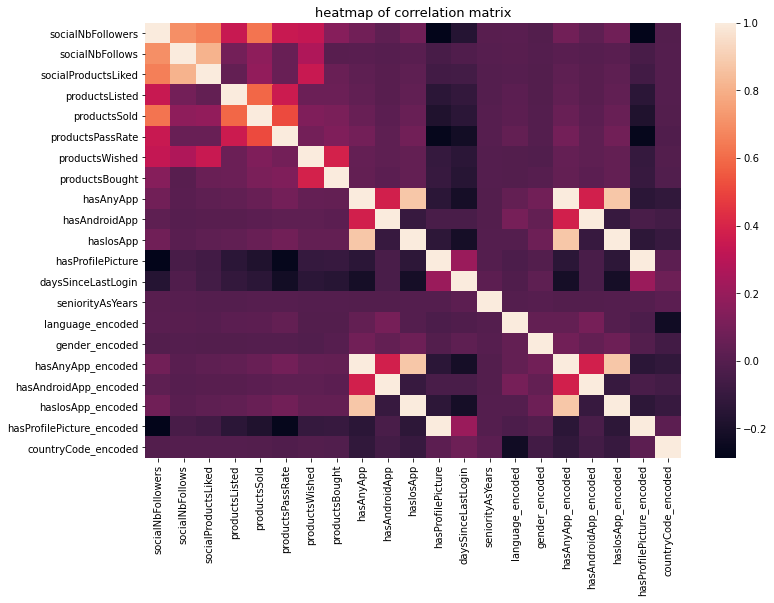

In [24]:
plt.figure(figsize=(12,8) )
plt.title("heatmap of correlation matrix", fontsize=13)
sns.heatmap(df_seg_lab.corr(), annot=False)

#### (2) Key KPI Correlation 
- First of all, we conducted further analysis on highly correlated variables to 'productsBought'.
- The result is listed as followed:
- We can see that the most relevant variable with 'productBought' is 'productsWished', and the correlation coefficient is 0.391640.

In [25]:
df_seg_lab.corr()['productsBought'].sort_values(ascending=False)

productsBought               1.000000
productsWished               0.391640
socialNbFollowers            0.147573
productsPassRate             0.126696
productsSold                 0.113755
productsListed               0.067782
socialProductsLiked          0.064741
hasAnyApp_encoded            0.044701
hasAnyApp                    0.044701
hasIosApp_encoded            0.041673
hasIosApp                    0.041673
hasAndroidApp_encoded        0.019118
hasAndroidApp                0.019118
socialNbFollows              0.006406
gender_encoded               0.003535
seniorityAsYears            -0.001147
language_encoded            -0.005304
countryCode_encoded         -0.010154
hasProfilePicture           -0.099806
hasProfilePicture_encoded   -0.099806
daysSinceLastLogin          -0.153429
Name: productsBought, dtype: float64

array([[<AxesSubplot:xlabel='productsBought', ylabel='productsBought'>,
        <AxesSubplot:xlabel='productsWished', ylabel='productsBought'>,
        <AxesSubplot:xlabel='socialNbFollowers', ylabel='productsBought'>,
        <AxesSubplot:xlabel='productsPassRate', ylabel='productsBought'>],
       [<AxesSubplot:xlabel='productsBought', ylabel='productsWished'>,
        <AxesSubplot:xlabel='productsWished', ylabel='productsWished'>,
        <AxesSubplot:xlabel='socialNbFollowers', ylabel='productsWished'>,
        <AxesSubplot:xlabel='productsPassRate', ylabel='productsWished'>],
       [<AxesSubplot:xlabel='productsBought', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='productsWished', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='socialNbFollowers', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='productsPassRate', ylabel='socialNbFollowers'>],
       [<AxesSubplot:xlabel='productsBought', ylabel='productsPassRate'>,
        <AxesSubplot:xlabel='pro

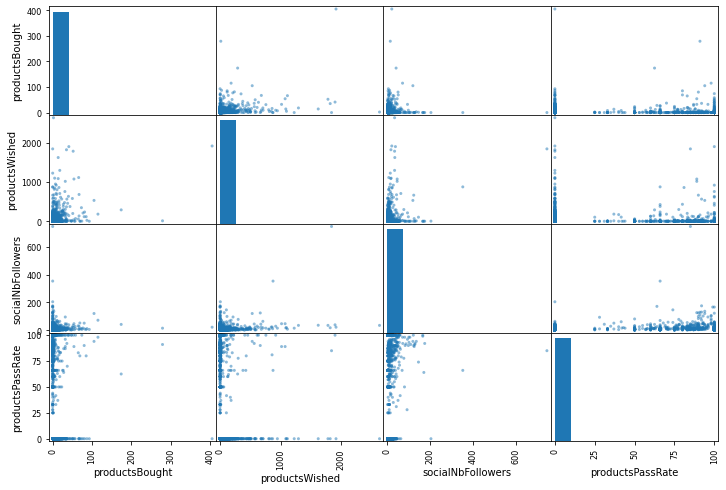

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_seg_lab[['productsBought','productsWished','socialNbFollowers','productsPassRate']],alpha=0.5,figsize=(12,8))

- Take a closer look at the correlation between 'productsBought' and 'productsWished'.
- The result is shown as followed:

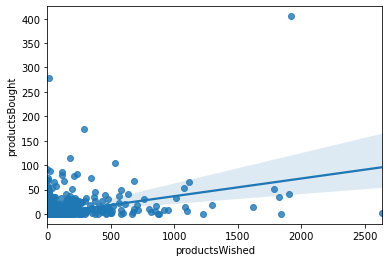

In [27]:
sns.regplot(x=df_seg_lab['productsWished'], y=df_seg_lab['productsBought'])
plt.show()

- Secondly, we did the same correlation analysis for 'productSold'.
- The result is shown as followed:
- We could see from the result that 'socialNbFollowers', 'productsListed' and 'productsPassRate' are all highy related to 'productcSold'.

In [28]:
df_seg_lab.corr()['productsSold'].sort_values(ascending=False)

productsSold                 1.000000
socialNbFollowers            0.627167
productsListed               0.589793
productsPassRate             0.514101
socialProductsLiked          0.181755
socialNbFollows              0.175296
productsWished               0.127732
productsBought               0.113755
hasAnyApp_encoded            0.060466
hasAnyApp                    0.060466
hasIosApp_encoded            0.058859
hasIosApp                    0.058859
language_encoded             0.022152
hasAndroidApp_encoded        0.015744
hasAndroidApp                0.015744
seniorityAsYears             0.003089
gender_encoded              -0.001110
countryCode_encoded         -0.008060
daysSinceLastLogin          -0.138637
hasProfilePicture           -0.179571
hasProfilePicture_encoded   -0.179571
Name: productsSold, dtype: float64

array([[<AxesSubplot:xlabel='productsSold', ylabel='productsSold'>,
        <AxesSubplot:xlabel='socialNbFollowers', ylabel='productsSold'>,
        <AxesSubplot:xlabel='productsListed', ylabel='productsSold'>,
        <AxesSubplot:xlabel='productsPassRate', ylabel='productsSold'>],
       [<AxesSubplot:xlabel='productsSold', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='socialNbFollowers', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='productsListed', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='productsPassRate', ylabel='socialNbFollowers'>],
       [<AxesSubplot:xlabel='productsSold', ylabel='productsListed'>,
        <AxesSubplot:xlabel='socialNbFollowers', ylabel='productsListed'>,
        <AxesSubplot:xlabel='productsListed', ylabel='productsListed'>,
        <AxesSubplot:xlabel='productsPassRate', ylabel='productsListed'>],
       [<AxesSubplot:xlabel='productsSold', ylabel='productsPassRate'>,
        <AxesSubplot:xlabel='socialNbFollowers',

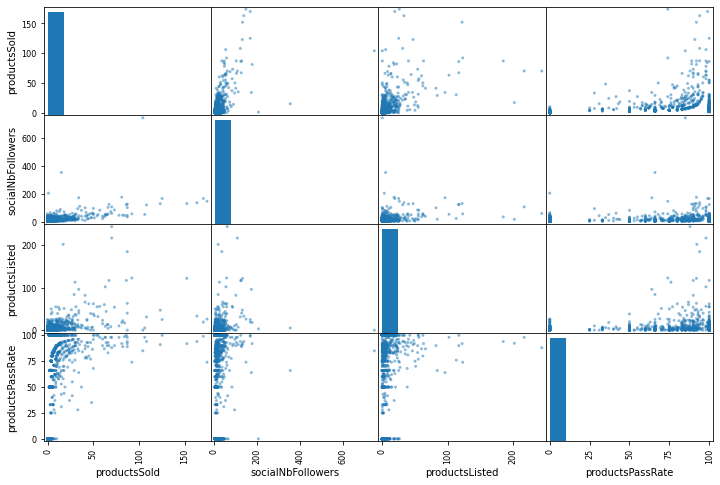

In [29]:
scatter_matrix(df_seg_lab[['productsSold','socialNbFollowers','productsListed','productsPassRate']],alpha=0.5,figsize=(12,8))

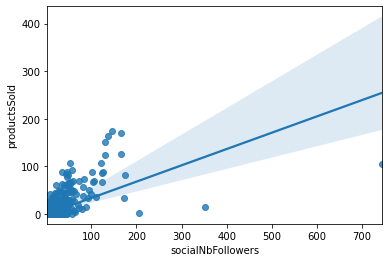

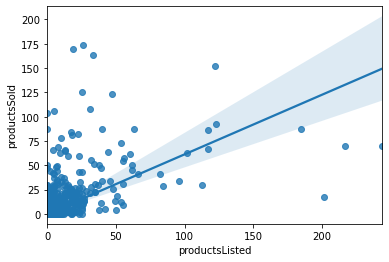

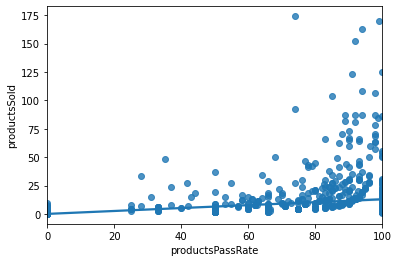

In [30]:
#Looks like the correlation between productsSold and socialNbFollowers/productsListed/productsPassRate is high
sns.regplot(x=df_seg_lab['socialNbFollowers'], y=df_seg_lab['productsSold'])
plt.show()

sns.regplot(x=df_seg_lab['productsListed'], y=df_seg_lab['productsSold'])
plt.show()

sns.regplot(x=df_seg_lab['productsPassRate'], y=df_seg_lab['productsSold'])
plt.show()

- Thirdly, we conducted correlation analysis for 'socialNbFollowers'.
- The result is shown as followed:
- We could see from the result that 'socialNbFollows','socialProductsLiked' and 'productsSold' are all highy related to 'socialNbFollowers'.

In [31]:
df_seg_lab.corr()['socialNbFollowers'].sort_values(ascending=False)

socialNbFollowers            1.000000
socialNbFollows              0.702766
socialProductsLiked          0.653540
productsSold                 0.627167
productsPassRate             0.351293
productsListed               0.343603
productsWished               0.334733
productsBought               0.147573
hasAnyApp_encoded            0.088570
hasAnyApp                    0.088570
hasIosApp_encoded            0.084025
hasIosApp                    0.084025
hasAndroidApp_encoded        0.027360
hasAndroidApp                0.027360
language_encoded             0.013255
seniorityAsYears             0.006030
gender_encoded              -0.007360
countryCode_encoded         -0.007755
daysSinceLastLogin          -0.159292
hasProfilePicture           -0.286141
hasProfilePicture_encoded   -0.286141
Name: socialNbFollowers, dtype: float64

array([[<AxesSubplot:xlabel='socialNbFollowers', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='socialNbFollows', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='socialProductsLiked', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='productsSold', ylabel='socialNbFollowers'>],
       [<AxesSubplot:xlabel='socialNbFollowers', ylabel='socialNbFollows'>,
        <AxesSubplot:xlabel='socialNbFollows', ylabel='socialNbFollows'>,
        <AxesSubplot:xlabel='socialProductsLiked', ylabel='socialNbFollows'>,
        <AxesSubplot:xlabel='productsSold', ylabel='socialNbFollows'>],
       [<AxesSubplot:xlabel='socialNbFollowers', ylabel='socialProductsLiked'>,
        <AxesSubplot:xlabel='socialNbFollows', ylabel='socialProductsLiked'>,
        <AxesSubplot:xlabel='socialProductsLiked', ylabel='socialProductsLiked'>,
        <AxesSubplot:xlabel='productsSold', ylabel='socialProductsLiked'>],
       [<AxesSubplot:xlabel='socialNbFollowers', ylabel='productsSold'>,
   

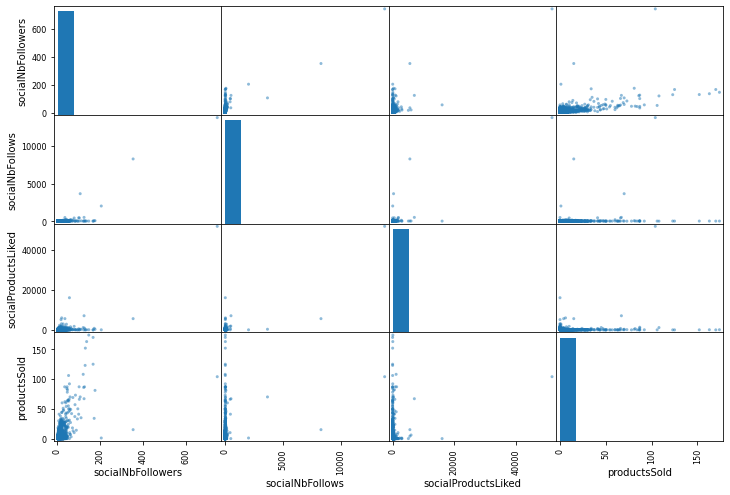

In [32]:
scatter_matrix(df_seg_lab[['socialNbFollowers','socialNbFollows','socialProductsLiked','productsSold']],alpha=0.5,figsize=(12,8))


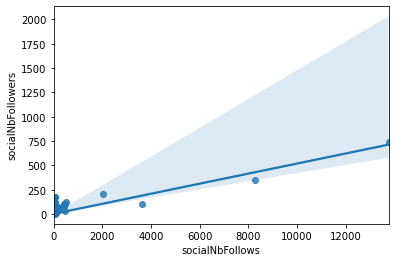

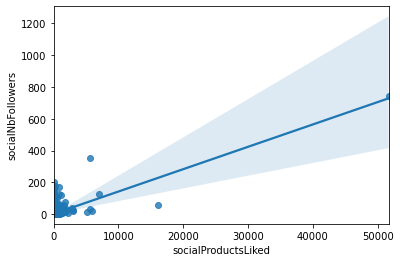

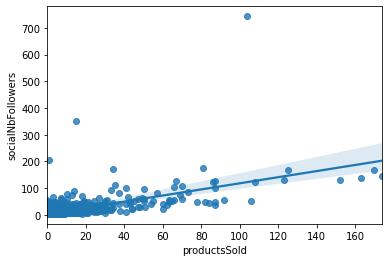

In [33]:
#Social followers have the strongest correlation with social follows, then the social products liked and products sold.
sns.regplot(x=df_seg_lab['socialNbFollows'], y=df_seg_lab['socialNbFollowers'])
plt.show()

sns.regplot(x=df_seg_lab['socialProductsLiked'], y=df_seg_lab['socialNbFollowers'])
plt.show()

sns.regplot(x=df_seg_lab['productsSold'], y=df_seg_lab['socialNbFollowers'])
plt.show()

- We conducted correlation analysis for 'socialNbFollows'.
- The result is shown as followed:
- We could see from the result that 'socialProductsLiked','socialNbFollowers' and 'productsWished' are all highy related to 'socialNbFollows'.

In [34]:
df_seg_lab.corr()['socialNbFollows'].sort_values(ascending=False)

socialNbFollows              1.000000
socialProductsLiked          0.809462
socialNbFollowers            0.702766
productsWished               0.266589
productsSold                 0.175296
productsListed               0.091306
productsPassRate             0.055519
hasIosApp_encoded            0.011391
hasIosApp                    0.011391
hasAnyApp                    0.011264
hasAnyApp_encoded            0.011264
language_encoded             0.008061
productsBought               0.006406
seniorityAsYears             0.004168
hasAndroidApp                0.001590
hasAndroidApp_encoded        0.001590
countryCode_encoded         -0.001141
gender_encoded              -0.001672
daysSinceLastLogin          -0.019811
hasProfilePicture           -0.041700
hasProfilePicture_encoded   -0.041700
Name: socialNbFollows, dtype: float64

array([[<AxesSubplot:xlabel='socialNbFollows', ylabel='socialNbFollows'>,
        <AxesSubplot:xlabel='socialProductsLiked', ylabel='socialNbFollows'>,
        <AxesSubplot:xlabel='socialNbFollowers', ylabel='socialNbFollows'>,
        <AxesSubplot:xlabel='productsWished', ylabel='socialNbFollows'>],
       [<AxesSubplot:xlabel='socialNbFollows', ylabel='socialProductsLiked'>,
        <AxesSubplot:xlabel='socialProductsLiked', ylabel='socialProductsLiked'>,
        <AxesSubplot:xlabel='socialNbFollowers', ylabel='socialProductsLiked'>,
        <AxesSubplot:xlabel='productsWished', ylabel='socialProductsLiked'>],
       [<AxesSubplot:xlabel='socialNbFollows', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='socialProductsLiked', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='socialNbFollowers', ylabel='socialNbFollowers'>,
        <AxesSubplot:xlabel='productsWished', ylabel='socialNbFollowers'>],
       [<AxesSubplot:xlabel='socialNbFollows', ylabel='productsWished'

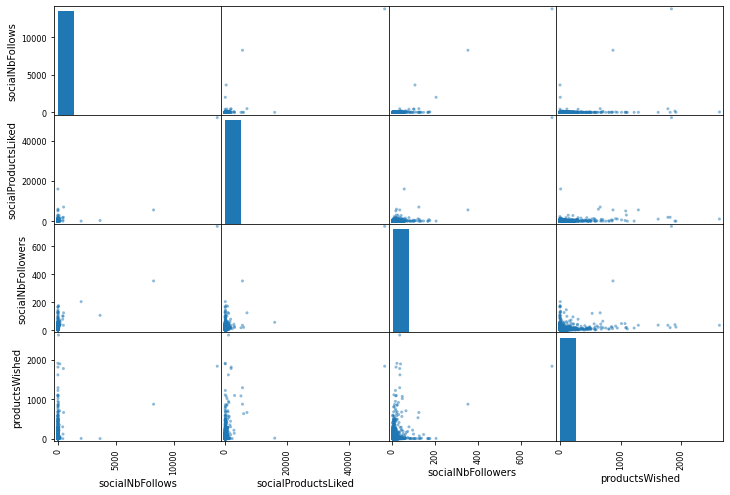

In [35]:
scatter_matrix(df_seg_lab[['socialNbFollows','socialProductsLiked','socialNbFollowers','productsWished']],alpha=0.5,figsize=(12,8))

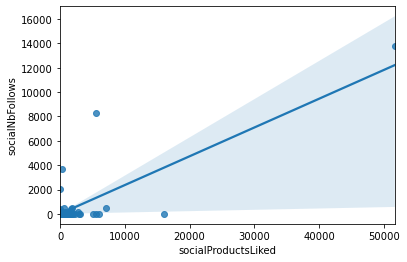

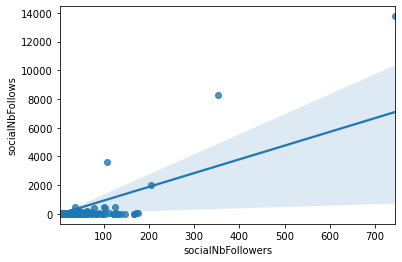

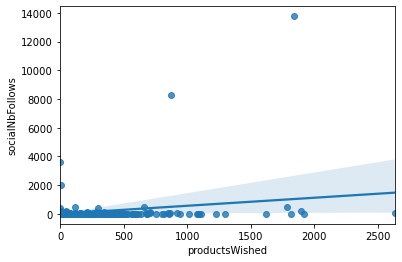

In [36]:
#Social followers have the strongest correlation with social follows, then the social products liked and products sold.
sns.regplot(x=df_seg_lab['socialProductsLiked'], y=df_seg_lab['socialNbFollows'])
plt.show()

sns.regplot(x=df_seg_lab['socialNbFollowers'], y=df_seg_lab['socialNbFollows'])
plt.show()

sns.regplot(x=df_seg_lab['productsWished'], y=df_seg_lab['socialNbFollows'])
plt.show()

- We also Compared the gender distribution in different language and country to gain more insight.
- It can be seen that the platform users in most countries are mainly females.

In [37]:
Groupbygender = df_seg_lab[df_seg_lab['countryCode'].isin(df_seg_lab['countryCode'].value_counts().index[:5] ) ].groupby(
    ['countryCode', 'gender'])[['gender']].count()
Groupbygender

gender
countryCode gender        
de          F         4577
            M         1990
fr          F        18085
            M         7050
gb          F         8732
            M         2578
it          F         5984
            M         2031
us          F        17079
            M         3523

<AxesSubplot:xlabel='countryCode'>

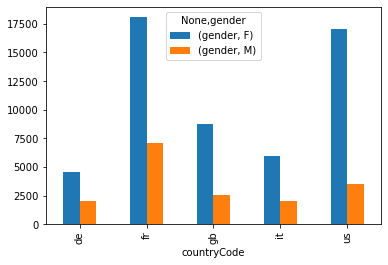

In [38]:
Groupbygender.unstack().plot(kind='bar')

In [39]:
Groupbygender_products = df_seg_lab[df_seg_lab['countryCode'].isin(df_seg_lab['countryCode'].value_counts().index[:5] ) ].groupby(
    ['countryCode', 'gender'])[['productsBought', 'productsSold']].agg([np.mean])
Groupbygender_products

productsBought productsSold
                             mean         mean
countryCode gender                            
de          F            0.261744     0.102250
            M            0.219598     0.034171
fr          F            0.123472     0.130771
            M            0.190071     0.092057
gb          F            0.183921     0.165140
            M            0.220326     0.141195
it          F            0.146056     0.311664
            M            0.170852     0.470212
us          F            0.109374     0.047837
            M            0.142492     0.042577

<AxesSubplot:xlabel='countryCode'>

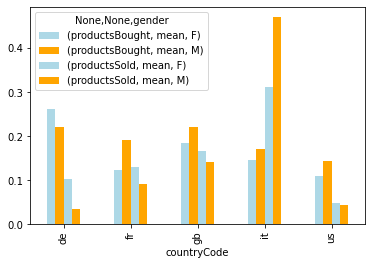

In [40]:
Groupbygender_products.unstack().plot(kind='bar',color=['lightblue', 'orange', 'lightblue', 'orange'])

In [41]:
Groupbylan = df_seg_lab.groupby(['language', 'gender'])[['gender']].count()
Groupbylan

gender
language gender        
DE       F         5143
         M         2035
EN       F        41077
         M        10487
ES       F         4752
         M         1281
FR       F        19372
         M         7000
IT       F         5777
         M         1989

<AxesSubplot:xlabel='language'>

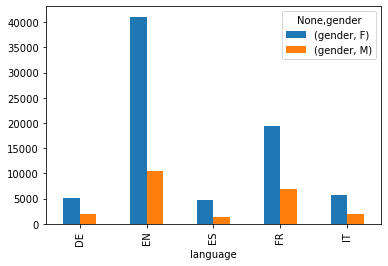

In [42]:
Groupbylan.unstack().plot(kind='bar')

In [43]:
Groupbylan_products = df_seg_lab.groupby(['language', 'gender'])[['productsBought', 'productsSold']].agg([np.mean])
Groupbylan_products

productsBought productsSold
                          mean         mean
language gender                            
DE       F            0.248299     0.093525
         M            0.210319     0.028501
EN       F            0.172238     0.097816
         M            0.175741     0.081911
ES       F            0.132155     0.148779
         M            0.131928     0.151444
FR       F            0.151094     0.120638
         M            0.208429     0.095286
IT       F            0.144885     0.313485
         M            0.182504     0.449975

<AxesSubplot:xlabel='language'>

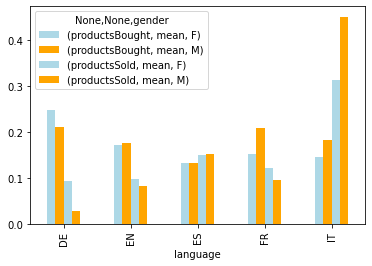

In [44]:
Groupbylan_products.unstack().plot(kind='bar',color=['lightblue', 'orange', 'lightblue', 'orange'])

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Step 4: Cluster Analysis

In [45]:
df_seg_lab

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,...,daysSinceLastLogin,seniorityAsYears,countryCode,language_encoded,gender_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded,countryCode_encoded
0,EN,147,10,77,26,174,74.0,104,1,M,...,11,8.88,gb,1,1,1,0,1,1,66
1,EN,167,8,2,19,170,99.0,0,0,F,...,12,8.90,mc,1,0,1,0,1,1,119
2,FR,137,13,60,33,163,94.0,10,3,F,...,11,8.90,fr,3,0,1,0,1,0,64
3,EN,131,10,14,122,152,92.0,7,0,F,...,12,8.88,us,1,0,1,0,1,0,185
4,EN,167,8,0,25,125,100.0,0,0,F,...,22,7.93,us,1,0,0,0,0,1,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,FR,3,8,0,0,0,0.0,0,0,M,...,708,8.90,us,3,1,0,0,0,1,185
98909,FR,3,8,0,0,0,0.0,0,0,M,...,695,8.90,fr,3,1,1,0,1,1,64
98910,EN,3,8,0,0,0,0.0,0,0,M,...,520,8.90,be,1,1,1,1,0,1,19
98911,IT,3,8,0,0,0,0.0,0,0,F,...,267,8.90,it,4,0,0,0,0,1,94


###  4.1  Select the Numerical Data

In [46]:
num_df_seg=df_seg_lab.copy()[['socialNbFollowers','socialNbFollows','socialProductsLiked','productsListed','productsSold','productsPassRate','productsWished','productsBought','daysSinceLastLogin']]
num_df_seg.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin
0,147,10,77,26,174,74.0,104,1,11
1,167,8,2,19,170,99.0,0,0,12
2,137,13,60,33,163,94.0,10,3,11
3,131,10,14,122,152,92.0,7,0,12
4,167,8,0,25,125,100.0,0,0,22


### 4.2 Exaggerate or Decrease the Effect of Several Key Features.

- Because the two key variables 'productsBought' and 'productsSold' have little difference between each data in the actual database, it is difficult to distinguish them effectively if they are directly used in cluster analysis. So we decided to use 'productsBought' and 'productsSold' after five times magnification.
- And for the 'daysSinceLastLogin',we reduced it to the 20% of the original in order to reduce the impact of variables on cluster analysis.
- So basically on this step we exaggerated the effect of products sold and products bought, and decreased the effect from daysSinceLastLogin feature.

In [47]:
#Exaggerate the effect of products sold and products bought
from sklearn.preprocessing import MinMaxScaler
num_scaled = MinMaxScaler().fit_transform(num_df_seg)
num_scaled = pd.DataFrame(num_scaled, columns= num_df_seg.columns)
num_scaled['productsBought'] = num_scaled['productsBought'] * 5
num_scaled['productsSold'] = num_scaled['productsSold'] * 5
num_scaled['daysSinceLastLogin'] = num_scaled['daysSinceLastLogin'] * 0.2
num_scaled.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin
0,0.194332,0.000727,0.001490,0.106557,5.000000,0.74,0.039469,0.012346,0.000000
1,0.221323,0.000581,0.000039,0.077869,4.885057,0.99,0.000000,0.000000,0.000287
2,0.180837,0.000944,0.001161,0.135246,4.683908,0.94,0.003795,0.037037,0.000000
3,0.172740,0.000727,0.000271,0.500000,4.367816,0.92,0.002657,0.000000,0.000287
4,0.221323,0.000581,0.000000,0.102459,3.591954,1.00,0.000000,0.000000,0.003152


### 4.3 Decide the Number of Cluser
- Using loop and kmeans , We plotted the distortion of different number of clusters, and finally determined the best cluster.
- From the result we could find out the best cluster is 4.

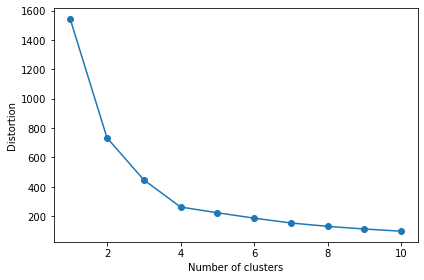

In [48]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(num_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### 4.4 Allocate Data to the Corresponding Cluster
- Apply cluster 4 to the kmeans function and we get the segementations.
- Now, each piece of data is assigned to a cluster, and we add this column to the dataset.

In [49]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1,random_state=0)
num_scaled['clusters'] = clustering_kmeans.fit_predict(num_scaled)
num_scaled

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,clusters
0,0.194332,0.000727,0.001490,0.106557,5.000000,0.74,0.039469,0.012346,0.000000,3
1,0.221323,0.000581,0.000039,0.077869,4.885057,0.99,0.000000,0.000000,0.000287,3
2,0.180837,0.000944,0.001161,0.135246,4.683908,0.94,0.003795,0.037037,0.000000,3
3,0.172740,0.000727,0.000271,0.500000,4.367816,0.92,0.002657,0.000000,0.000287,3
4,0.221323,0.000581,0.000000,0.102459,3.591954,1.00,0.000000,0.000000,0.003152,3
...,...,...,...,...,...,...,...,...,...,...
98908,0.000000,0.000581,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.199713,0
98909,0.000000,0.000581,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.195989,0
98910,0.000000,0.000581,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.145845,0
98911,0.000000,0.000581,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.073352,2


### 4.5 Apply PCA Method
- We wanna see the clustering map in order to have a clearer vision of our clustering. The problem is right now there are too many variables that will affect the intuition of the map.
- By applying the PCA method we can get PCA1 and PCA2, we got the Kmeans clustering with 2 dimensions, which shows a clear distribution.

           pca1      pca2
0      2.662323  2.966991
1      2.663796  3.130209
2      2.662018  2.994917
3      2.659595  2.842370
4      2.654187  2.531642
...         ...       ...
98908 -0.388454 -0.004967
98909 -0.388195 -0.004634
98910 -0.384717 -0.000160
98911  1.615324 -0.030699
98912 -0.385532 -0.001208

[98913 rows x 2 columns]


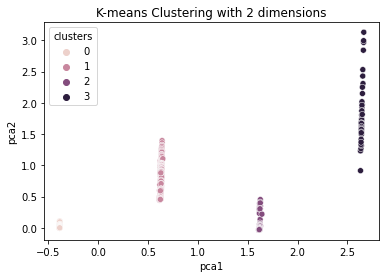

In [50]:
reduced_data = PCA(n_components=2).fit_transform(num_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
print(results)
sns.scatterplot(x="pca1", y="pca2", hue=num_scaled['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### 4.6 Further Analysis of The Cluster
- And here shows the mean of each feature for different clusters.

In [51]:
num_cluster_mean = num_scaled.groupby('clusters').agg([np.mean])
num_cluster_mean

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin
,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,
0,0.000244,0.000583,0.000011,0.000019,0.000140,0.000000,0.000079,0.000370,0.190800
1,0.014908,0.001582,0.000980,0.023288,0.227074,0.869076,0.007792,0.036696,0.024895
2,0.001070,0.000617,0.000294,0.000375,0.001677,0.000303,0.002339,0.007701,0.053525
3,0.116548,0.029519,0.027379,0.194105,2.252996,0.906298,0.044661,0.112950,0.004719


- According to the mean of each feature calculated above, we use a radar chart to visualize the result.

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


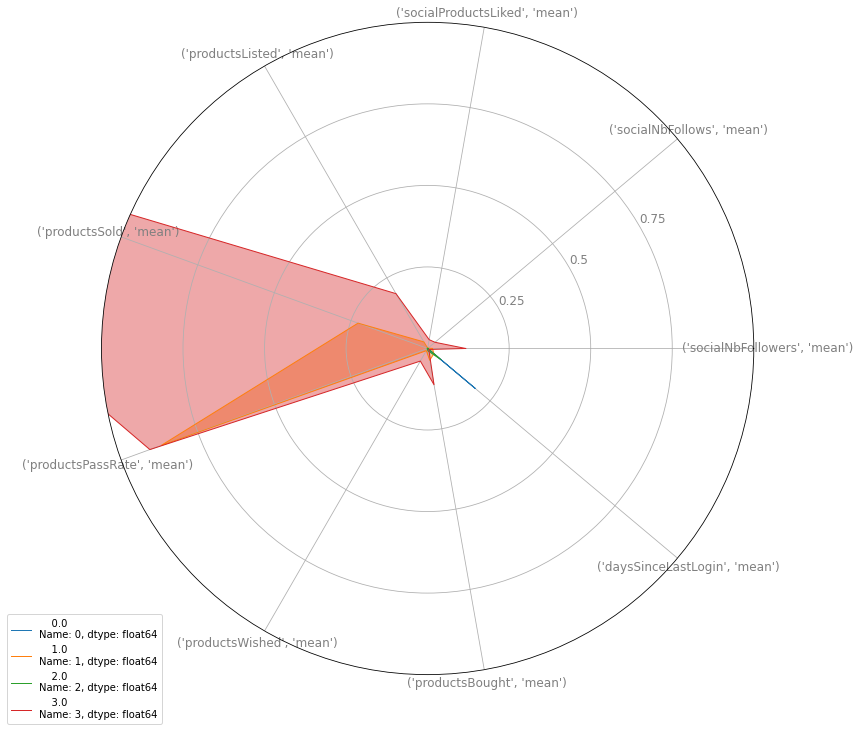

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

idx = 0
new_col = [0, 1, 2, 3]
num_rad=num_cluster_mean.copy()
num_rad.insert(loc=idx, column='cluster', value=new_col)

categories = list(num_rad)[1:]
values = num_rad.values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# define plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12),
                        subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(0.25,1,0.25), ['0.25','0.5','0.75'],
           color='grey', size=12)
plt.ylim(0, 1)
ax.set_rlabel_position(30)

# draw radar-chart:
for i in range(len(num_rad)):
    val_c1 = num_rad.loc[i].drop('cluster').values.flatten().tolist()
    val_c1 += val_c1[:1]
    ax.plot(angles, val_c1, linewidth=1, linestyle='solid',
            label=num_rad.loc[i]["cluster"])
    ax.fill(angles, val_c1, alpha=0.4)

# add legent and show plot
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

- Here shows the cluster_centers of each clusters and the propotion of different clusters.

In [53]:
r1 = pd.Series(clustering_kmeans.labels_).value_counts()  
r2 = pd.DataFrame(clustering_kmeans.cluster_centers_)    
r = pd.concat([r2, r1], axis = 1) 
r.columns = list(num_df_seg.columns) + [u'Counts']
r

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,Counts
0,0.000244,0.000583,0.000011,0.000019,0.000140,5.915407e-16,0.000079,0.000370,0.190765,79373
1,0.014908,0.001582,0.000980,0.023288,0.227074,8.690759e-01,0.007792,0.036696,0.024895,869
2,0.001072,0.000617,0.000295,0.000376,0.001681,3.040413e-04,0.002343,0.007716,0.053374,18624
3,0.116548,0.029519,0.027379,0.194105,2.252996,9.062979e-01,0.044661,0.112950,0.004719,47


In [54]:
print('cluster propotion：' )
countAll = num_scaled['clusters'].count()
for i in range(4):
    print("Cluster % s is %.02f%%" %(i, 100 * (num_scaled['clusters'][num_scaled['clusters'] == i]).count() / countAll) )

cluster propotion：
Cluster 0 is 80.25%
Cluster 1 is 0.88%
Cluster 2 is 18.83%
Cluster 3 is 0.05%


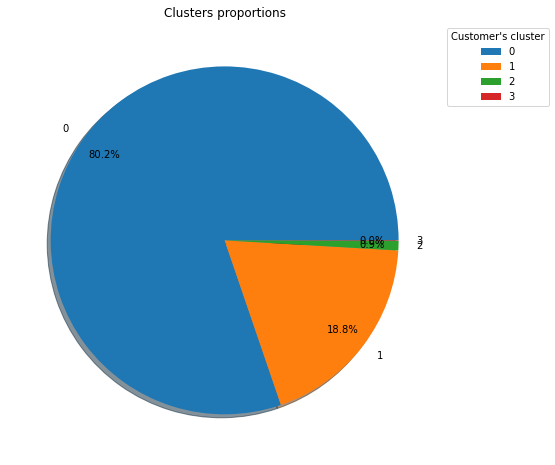

In [55]:
sizes = dict(num_scaled['clusters'].value_counts())
plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

- Then we added the culster cloumn to the original dataset and explore more.

In [56]:
df_seg['clusters']=num_scaled['clusters']
df_seg.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,clusters
0,-1097895247965112460,user,Royaume-Uni,EN,147,10,77,26,174,74.0,...,True,False,True,True,11,3196,106.53,8.88,gb,3
1,2347567364561867620,user,Monaco,EN,167,8,2,19,170,99.0,...,True,False,True,True,12,3204,106.80,8.90,mc,3
2,6870940546848049750,user,France,FR,137,13,60,33,163,94.0,...,True,False,True,False,11,3203,106.77,8.90,fr,3
3,-4640272621319568052,user,Etats-Unis,EN,131,10,14,122,152,92.0,...,True,False,True,False,12,3198,106.60,8.88,us,3
4,-5175830994878542658,user,Etats-Unis,EN,167,8,0,25,125,100.0,...,False,False,False,True,22,2854,95.13,7.93,us,3


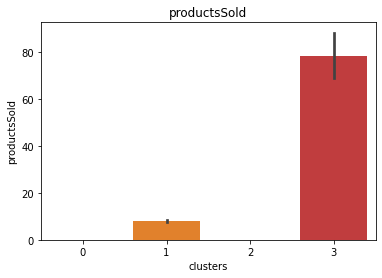

In [57]:
sns.barplot(x=df_seg.clusters, y=df_seg.productsSold).set_title('productsSold');

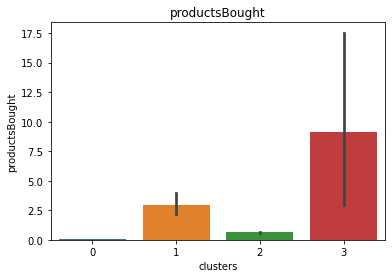

In [58]:
sns.barplot(x=df_seg.clusters, y=df_seg.productsBought).set_title('productsBought');

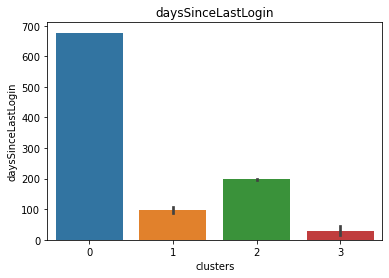

In [59]:
sns.barplot(x=df_seg.clusters, y=df_seg.daysSinceLastLogin).set_title('daysSinceLastLogin');

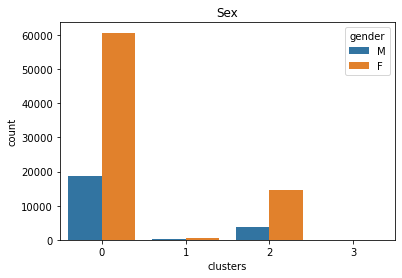

In [60]:
sns.countplot(data=df_seg, x='clusters', hue='gender').set_title('Sex');

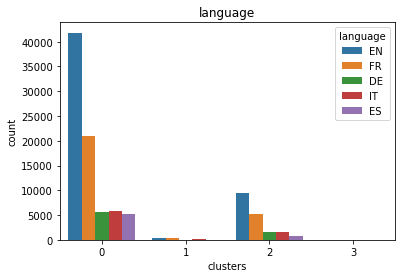

In [61]:
sns.countplot(data=df_seg, x='clusters', hue='language').set_title('language');

### 4.7 Conclusion

- From the radar chart, we can define this C2C platform users into 4 segmentations:

#### (1) Premium Users:
- Cluster 3, account for 0.05% of all users. They sell and buy products frequently on the app, with high products pass rate and a strong preference for listing products. They also have way more social media participation compared to other clusters, and they are logging in in recent times.
- Targeting on this cluster, we can introduce membership or priority programmes to them to maintain their loyalty and invite them to have surveys to fine-tune the products.

#### (2) Active Users: 
- Cluster 1, account for 0.88% of all users. They sell and buy products less frequently than gold users but they also have high products pass rates and have huge potential.
- Targeting on this cluster, we can introduce a bonus system for them to raise the selling and buying behaviour and transform them to premium users.

#### (3) Silent Users: 
- Cluster 2, account for 18.83% of all users. They nearly have no using behaviour but the last login time is not long.
- Targeting on this cluster, we can introduce new-user campaigns like First order discount， to switch their visiting to profit.

#### (4) Lost Users: 
- Cluster 0, account for 80.2% of all users which is the great majority. They merely have user behaviour and they haven't logged in for a long time.
- Targeting on this cluster, sending email or notification to arouse their interest of returning.
- We also group the cluster by different languages and genders, finding female dominates in every cluster, and English/French are the main languages in every cluster.



<p style= 'color: navy; background: #FF5A28 ; text-align: center; padding: 15px; border-radius: 10px;font-size: 20px; font-weight: bold'> Part 2 : Classifying the users

One of the main factors responsible for the success of e-commerce is the customer. The fact that the customer can be both a customer and a supplier contributes to the smooth running of any good e-commerce platform. That's why our dataset focuses on a C2C (Customer To Customer) e-commerce platform specialized in fashion.

Managing an e-commerce store has many unknowns, perfectly represented by this set of analytical data retrieved and summarized in our dataset. We will see what their impact is, but also their influence on our other data.

Using this dataset, we will ask ourselves the following question: Having a data set of several users (who have been put into 4 different clusters, from our previous question), how could we classify them in each country according to their performances ? We will focus on categorizing countries in order to guess the best marketplaces where we can make profits.

The main goal is to apply a customer retention on the Active Users cluster.

So we will start by cleaning our data, then perform an exploratory visualization of the data, and finally use feature reduction to run our data through some simple machine learning algorithms (here we will set up a decision tree model, as well as a logistic regression).


<h1 style= 'color: blue; background: lightgreen 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>
 Predicting Sales

For e-commerce players, predicting sales is critical in order to improve the user experience and to provide customized recommendations. In this part, we are interested in predicting whether a user will sell or not on the website.

In [62]:
df = pd.read_csv('6M-0K-99K.users.dataset.public.csv')
df

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,-5324380437900495747,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.80,8.90,us
98909,-5607668753771114442,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.80,8.90,fr
98910,350630276238833248,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.80,8.90,be
98911,2006580738726207028,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.80,8.90,it


<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>  Quick glance of the data

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [64]:
df.head(3)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr


<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Dropping columns we don't need for this classification problem

In [65]:
df.drop(columns=['gender','hasAnyApp','country','identifierHash', 'type', 'civilityTitle', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'], inplace=True)
df

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority
0,en,147,10,77,26,174,74.0,104,1,1,False,True,True,11,3196
1,en,167,8,2,19,170,99.0,0,0,2,False,True,True,12,3204
2,fr,137,13,60,33,163,94.0,10,3,2,False,True,False,11,3203
3,en,131,10,14,122,152,92.0,7,0,2,False,True,False,12,3198
4,en,167,8,0,25,125,100.0,0,0,2,False,False,True,22,2854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,fr,3,8,0,0,0,0.0,0,0,1,False,False,True,708,3204
98909,fr,3,8,0,0,0,0.0,0,0,1,False,True,True,695,3204
98910,en,3,8,0,0,0,0.0,0,0,1,True,False,True,520,3204
98911,it,3,8,0,0,0,0.0,0,0,2,False,False,True,267,3204


<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Summary of the numerical attributes

In [66]:
round(df.describe(),0)

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority
count,98913.0,98913.0,98913.0,98913.0,98913.0,98913.0,98913.0,98913.0,98913.0,98913.0,98913.0
mean,3.0,8.0,4.0,0.0,0.0,1.0,2.0,0.0,2.0,581.0,3064.0
std,4.0,53.0,181.0,2.0,2.0,9.0,25.0,2.0,0.0,209.0,168.0
min,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,2852.0
25%,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,572.0,2857.0
50%,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,694.0,3196.0
75%,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,702.0,3201.0
max,744.0,13764.0,51671.0,244.0,174.0,100.0,2635.0,405.0,3.0,709.0,3205.0


<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Deep Dive

In [67]:
df.corr().style.background_gradient(axis=0, cmap='PuRd')

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority
socialNbFollowers,1.000000,0.702766,0.653540,0.343603,0.627167,0.351293,0.334733,0.147573,0.013622,0.027360,0.084025,-0.286141,-0.159292,0.006034
socialNbFollows,0.702766,1.000000,0.809462,0.091306,0.175296,0.055519,0.266589,0.006406,0.001672,0.001590,0.011391,-0.041700,-0.019811,0.004150
socialProductsLiked,0.653540,0.809462,1.000000,0.044845,0.181755,0.059395,0.349138,0.064741,0.005771,0.006367,0.026401,-0.063859,-0.055166,-0.001000
productsListed,0.343603,0.091306,0.044845,1.000000,0.589793,0.361279,0.066384,0.067782,0.010018,0.007728,0.038941,-0.138434,-0.112651,-0.002707
productsSold,0.627167,0.175296,0.181755,0.589793,1.000000,0.514101,0.127732,0.113755,0.006866,0.015744,0.058859,-0.179571,-0.138637,0.003074
productsPassRate,0.351293,0.055519,0.059395,0.361279,0.514101,1.000000,0.090998,0.126696,0.011697,0.030102,0.087844,-0.267112,-0.223065,0.001417
productsWished,0.334733,0.266589,0.349138,0.066384,0.127732,0.090998,1.000000,0.391640,0.012021,0.026736,0.040722,-0.103533,-0.136508,-0.004053
productsBought,0.147573,0.006406,0.064741,0.067782,0.113755,0.126696,0.391640,1.000000,-0.001330,0.019118,0.041673,-0.099806,-0.153429,-0.001138
civilityGenderId,0.013622,0.001672,0.005771,0.010018,0.006866,0.011697,0.012021,-0.001330,1.000000,-0.039205,-0.070743,-0.006586,-0.038104,-0.001969
hasAndroidApp,0.027360,0.001590,0.006367,0.007728,0.015744,0.030102,0.026736,0.019118,-0.039205,1.000000,-0.099785,-0.038601,-0.038464,-0.007397


**We are now going to use the "socialNbFollowers" column as we previously saw high correlation between "socialNbFollowers" and "productsSold"**

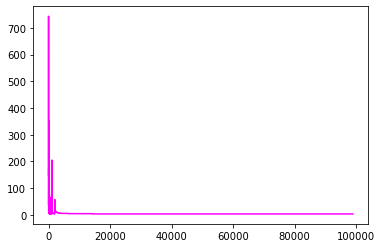

In [68]:
df['socialNbFollowers'].plot(kind='line', color='magenta')
plt.show()

***Cap the number of followers***

In [69]:
df["follower_cat"] = df["socialNbFollowers"]
# Label those above 15 as 15
df["follower_cat"].where(df["follower_cat"] < 10, 10, inplace=True)

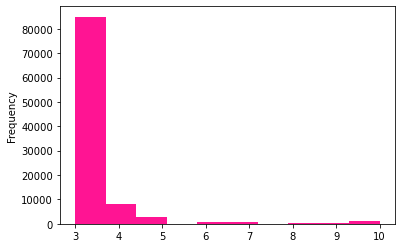

In [70]:
df["follower_cat"].plot(kind="hist",  color='deeppink')
plt.show()

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Transform the data for classification: did the user sell any product at all?

In [71]:
df["hasSold"] = df["productsSold"] > 0

<AxesSubplot:ylabel='Frequency'>

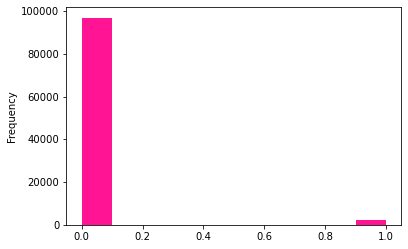

In [72]:
df["hasSold"].astype(np.int32).plot(kind="hist", color='deeppink')

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>  Creating a Test Set

In [73]:
from sklearn.model_selection import train_test_split

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Creating a test set using Stratified Selection

**Stratified sampling**

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["follower_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
strat_test_set

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,follower_cat,hasSold
53056,en,3,8,0,0,0,0.0,0,0,2,False,False,True,700,3196,3,False
73202,en,3,8,0,0,0,0.0,0,0,2,False,False,True,695,2856,3,False
40899,en,3,8,0,0,0,0.0,0,0,1,True,False,True,694,3199,3,False
63726,en,3,8,32,0,0,0.0,0,0,1,False,True,True,327,2859,3,False
6557,en,4,8,1,0,0,0.0,0,0,2,False,False,True,563,3203,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39823,fr,3,8,0,0,0,0.0,0,0,2,False,False,True,703,3199,3,False
36161,en,3,8,2,0,0,0.0,1,0,2,False,False,True,703,3199,3,False
54338,de,3,8,0,0,0,0.0,0,0,2,False,False,True,700,3196,3,False
92416,en,3,8,0,0,0,0.0,0,0,2,False,False,True,691,2852,3,False


**To see if this worked as expected, compare the follower category proportions in the full df dataset and the test dataset we just obtained:**

In [75]:
strat_test_set["follower_cat"].value_counts()/strat_test_set["follower_cat"].count()*100

3     85.871708
4      8.310165
5      2.749836
10     1.122176
6      0.823940
7      0.545923
8      0.338675
9      0.237578
Name: follower_cat, dtype: float64

In [76]:
df["follower_cat"].value_counts()/df["follower_cat"].count()*100

3     85.872433
4      8.309322
5      2.749891
10     1.124220
6      0.821934
7      0.544923
8      0.339692
9      0.237583
Name: follower_cat, dtype: float64

The following code compares the follower category proportions in the overall dataset, in the test set generated with stratified sampling, and in a test set generated using purely random sampling. As you can see, the test set generated using stratified sampling has follower category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed.



In [77]:
def follower_cat_proportions(data):
    return data["follower_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": follower_cat_proportions(df),
    "Stratified": follower_cat_proportions(strat_test_set),
    "Random": follower_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [78]:
follower_cat_proportions(strat_test_set)

3     0.858717
4     0.083102
5     0.027498
10    0.011222
6     0.008239
7     0.005459
8     0.003387
9     0.002376
Name: follower_cat, dtype: float64

**Drop the "follower_cat" column from the stratified training and testing sets**

In [79]:
strat_test_set.drop("follower_cat", axis=1, inplace=True)

In [80]:
strat_train_set.drop("follower_cat", axis=1, inplace=True)

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Rebalancing the class <code>hasSold</code>

In [81]:
strat_test_set.drop("productsSold", axis=1, inplace=True)
strat_train_set.drop("productsSold", axis=1, inplace=True)

In [82]:
X = df.drop(columns=["hasSold"])
y = df["hasSold"]

In [83]:
strat_train_set_true = strat_train_set.loc[strat_train_set["hasSold"]]
strat_train_set_false = strat_train_set.loc[strat_train_set["hasSold"] != True]

In [84]:
# hardcoded value to find a compromise between balance and enough data
strat_train_set_rebalanced = pd.concat([strat_train_set_true,strat_train_set_false[:7000]])

In [85]:
print("Proportion of target class previously:", len(strat_train_set_true)/len(strat_train_set))
print("Proportion of target class in rebalanced dataset:", len(strat_train_set_true)/len(strat_train_set_rebalanced))

Proportion of target class previously: 0.020219891318084167
Proportion of target class in rebalanced dataset: 0.18604651162790697


In [86]:
# Reshuffle
strat_train_set_rebalanced = strat_train_set_rebalanced.sample(frac=1)
strat_train_set_rebalanced

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsPassRate,productsWished,productsBought,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,hasSold
65942,fr,3,8,0,0,0.0,0,0,1,False,False,True,565,2858,False
46211,de,3,8,0,0,0.0,0,0,1,False,False,True,702,3198,False
368,it,13,8,0,1,85.0,0,0,1,True,False,True,109,2852,True
46074,en,3,8,0,0,0.0,0,0,2,False,False,True,589,3198,False
53321,fr,3,8,0,0,0.0,0,0,1,False,False,True,564,3196,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,de,7,10,118,0,0.0,7,0,2,False,True,True,14,3195,True
433,fr,8,8,1,9,100.0,0,0,2,False,True,True,16,2858,True
15673,es,3,8,1,0,0.0,0,0,2,False,False,True,708,3204,False
44578,fr,3,8,0,0,0.0,0,0,2,False,False,True,702,3198,False


<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>  Data Exploration


In [87]:
df = strat_train_set_rebalanced.copy()

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Looking for correlations again. Are there new observations? 


In [88]:
df.corr().style.background_gradient(axis=None,  cmap='PuRd')  

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsPassRate,productsWished,productsBought,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,hasSold
socialNbFollowers,1.000000,0.736352,0.724607,0.356847,0.348790,0.401353,0.105396,0.026738,0.046472,0.140391,-0.318886,-0.249196,0.023426,0.298399
socialNbFollows,0.736352,1.000000,0.936439,0.103689,0.052422,0.391334,0.002045,0.001862,0.005048,0.024556,-0.055782,-0.036392,0.011713,0.038246
socialProductsLiked,0.724607,0.936439,1.000000,0.041683,0.060180,0.468516,0.042702,0.010540,0.003274,0.030269,-0.072389,-0.054354,0.004412,0.051341
productsListed,0.356847,0.103689,0.041683,1.000000,0.342536,0.082248,0.061615,0.022642,0.014447,0.089175,-0.184452,-0.225480,-0.010216,0.249111
productsPassRate,0.348790,0.052422,0.060180,0.342536,1.000000,0.122511,0.128816,0.033181,0.078338,0.219885,-0.405262,-0.499821,0.006137,0.625906
productsWished,0.401353,0.391334,0.468516,0.082248,0.122511,1.000000,0.473614,0.020478,0.061214,0.046833,-0.114330,-0.148772,0.001258,0.132651
productsBought,0.105396,0.002045,0.042702,0.061615,0.128816,0.473614,1.000000,0.005218,0.029270,0.040055,-0.087143,-0.149818,-0.000721,0.144261
civilityGenderId,0.026738,0.001862,0.010540,0.022642,0.033181,0.020478,0.005218,1.000000,-0.025565,-0.054480,-0.016810,-0.064280,-0.019246,0.046061
hasAndroidApp,0.046472,0.005048,0.003274,0.014447,0.078338,0.061214,0.029270,-0.025565,1.000000,-0.119588,-0.064688,-0.077643,-0.024200,0.096589
hasIosApp,0.140391,0.024556,0.030269,0.089175,0.219885,0.046833,0.040055,-0.054480,-0.119588,1.000000,-0.230776,-0.312240,0.007538,0.296874


**After re-balancing the training set, we see an interesting change in the correlations: new correlation has emerged - for example: <code> productsPassRate </code> & <code> productsPhasSoldassRate </code>**

In [89]:
df.corr()['hasSold'].sort_values(ascending=False)

hasSold                1.000000
productsPassRate       0.625906
socialNbFollowers      0.298399
hasIosApp              0.296874
productsListed         0.249111
productsBought         0.144261
productsWished         0.132651
hasAndroidApp          0.096589
socialProductsLiked    0.051341
civilityGenderId       0.046061
socialNbFollows        0.038246
seniority              0.004257
hasProfilePicture     -0.458163
daysSinceLastLogin    -0.620864
Name: hasSold, dtype: float64

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Preparing the data for Machine Learning algorithms


**Data Cleaning:  Dropping the labels from the training set and creating a new variable for the labels**

In [90]:
df = strat_train_set_rebalanced.drop("hasSold", axis=1) # drop labels for training set
df_labels = strat_train_set_rebalanced["hasSold"].copy()

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Building a pipeline for numerical attributes

In [91]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

Define the dataframe of numerical attributes, by dropping categorical attributes from the `df` dataframe, call the result `df_num`.
Then appply the above pipeline to `df_num`. Store the result in a dataframe called `df_num_tr`.

In [92]:
df_num = df.drop(['language', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture'], axis=1)

In [93]:
df_num_tr = num_pipeline.fit_transform(df_num)

In [94]:
df_num_tr

array([[-0.16562063, -0.01889856, -0.02885726, ..., -1.74924323,
         0.17561405, -1.21792497],
       [-0.16562063, -0.01889856, -0.02885726, ..., -1.74924323,
         0.71258817,  0.80061697],
       [ 0.70970963, -0.01889856, -0.02885726, ..., -1.74924323,
        -1.61168665, -1.2535463 ],
       ...,
       [-0.16562063, -0.01889856, -0.02711274, ...,  0.4810743 ,
         0.73610528,  0.8362383 ],
       [-0.16562063, -0.01889856, -0.02885726, ...,  0.4810743 ,
         0.71258817,  0.80061697],
       [-0.16562063, -0.01889856, -0.0096675 , ...,  0.4810743 ,
         0.05802848, -1.21198808]])

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Creating a single pipeline with numerical & categorical values which were converted to numberical values

In [95]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = ['language', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df)

In [96]:
df_prepared.shape

(8600, 21)

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Select, Train and Evaluate a Model 

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Logistical Regression Model

In [97]:
import sklearn.linear_model
log_reg = sklearn.linear_model.LogisticRegression()
X = df_prepared
y = df_labels
log_reg.fit(X, y)

LogisticRegression()

In [98]:
log_reg.predict(X)

array([False, False,  True, ..., False, False, False])

In [99]:
log_reg.score(X,y)

0.9319767441860465

***Measuring the regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function***

In [100]:
from sklearn.metrics import mean_squared_error
prediction = log_reg.predict(df_prepared)
mse = mean_squared_error(df_labels.astype(np.float32), prediction.astype(np.float32))
rmse = np.sqrt(mse)
rmse

0.2608127

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier
tree_reg = DecisionTreeClassifier(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeClassifier(random_state=42)

***Evaluate the tree model using 10-fold cross validation***

In [102]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="accuracy", cv=10)

In [103]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", f"{scores.mean():.3}")
    print("Standard deviation:", scores.std())

display_scores(scores)

Scores: [0.92325581 0.92790698 0.91744186 0.94069767 0.90697674 0.93139535
 0.91162791 0.92093023 0.9244186  0.91511628]
Mean: 0.922
Standard deviation: 0.009395607871170122


***Computing the same scores for the Logistic Regression model just to be sure***

In [104]:
log_reg = sklearn.linear_model.LogisticRegression()

scores = cross_val_score(log_reg, df_prepared, df_labels, cv=10)
display_scores(scores)

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scores: [0.92209302 0.94302326 0.92093023 0.93953488 0.93139535 0.92790698
 0.9255814  0.94186047 0.93953488 0.92674419]
Mean: 0.932
Standard deviation: 0.007992018733692815


/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**We observe that the results are not as good as the Logistic Regression Model,so let's try one last model: Random Forests Classifier:**

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Random Forests Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(df_prepared, df_labels)
prediction3 = model2.predict(df_prepared)

In [236]:
scores = cross_val_score(model2, df_prepared, df_labels, scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.94302326 0.95116279 0.93023256 0.94767442 0.95581395 0.94883721
 0.94302326 0.96046512 0.94302326 0.93488372]
Mean: 0.945813953488372
Standard deviation: 0.008610934223987721


<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>  Fine-tuning the model

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'>Using Grid Search to optimize the hyperparameters of the Random Forest Classifier.

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [109]:
forest_reg = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_prepared, df_labels)

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/MaxiPunKey/opt/anaconda3/lib/python3

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Display the best hyperparameter combination found, and best estimator:

In [110]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 3}

In [111]:
grid_search.best_estimator_

RandomForestClassifier(max_features=2, n_estimators=3, random_state=42)

In [112]:
search_results = grid_search.cv_results_
for score, params in zip(search_results["mean_test_score"], search_results["params"]):
    print(np.sqrt(-score), params)

nan {'max_features': 2, 'n_estimators': 3}
nan {'max_features': 2, 'n_estimators': 10}
nan {'max_features': 2, 'n_estimators': 30}
nan {'max_features': 4, 'n_estimators': 3}
nan {'max_features': 4, 'n_estimators': 10}
nan {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>  Analyzing the best models and their Errors

In [113]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.14251642, 0.03248622, 0.045499  , 0.06385013, 0.19439232,
       0.01974769, 0.05091514, 0.02453674, 0.27336394, 0.06012588,
       0.00346052, 0.00794845, 0.00352926, 0.00808426, 0.00416459,
       0.00319999, 0.0043828 , 0.0029932 , 0.0133848 , 0.01894506,
       0.02247359])

In [114]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.273363939679494, 'daysSinceLastLogin'),
 (0.1943923178805833, 'productsPassRate'),
 (0.1425164150246241, 'socialNbFollowers'),
 (0.06385013086087511, 'productsListed'),
 (0.060125877490888324, 'seniority'),
 (0.050915139628842004, 'productsBought'),
 (0.045498997698024346, 'socialProductsLiked'),
 (0.03248622495720907, 'socialNbFollows'),
 (0.02453674021226993, 'civilityGenderId'),
 (0.01974769246398283, 'productsWished'),
 (0.008084261263044136, 'fr'),
 (0.007948446934518998, 'en'),
 (0.004164590794668394, 'it'),
 (0.0035292574935080357, 'es'),
 (0.0034605216774092518, 'de')]

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
# model_last = grid_search.best_estimator_
model_last = model2

X_test = strat_test_set.drop("hasSold", axis=1)
y_test = strat_test_set["hasSold"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = model_last.predict(X_test_prepared)

accuracy_last = accuracy_score(y_test, final_predictions)
accuracy_last

0.9688116059242784

**An accuracy of 96% !** 

**Let's check the confusion matrix:**

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>  Corresponding Confusion Matrix

In [117]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, final_predictions)
confusion_mat = confusion_mat / len(y_test) * 100

In [118]:
confusion_mat

array([[95.05130668,  2.74478087],
       [ 0.37405854,  1.82985391]])

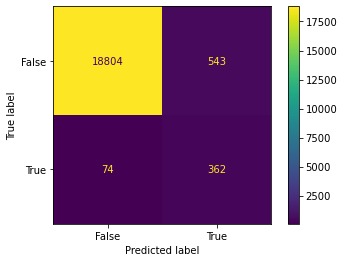

In [119]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_last, X_test_prepared, y_test)
plt.show()

#### DISCLAIMER :
The question number 2 has been inspired by the project about classifying genre songs, on DataCamp :
https://projects.datacamp.com/projects/449

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Question 2.1 - Predicting future purchases based on previous purchases 

As our previous question did not succeed with efficiency, we turned to a completely different problem, without changing the prediction models, namely to keep the classification logic. 

Our question is now to predict the future purchases of users, by classifying them into three distinct categories of buyers : 
- category 1, which will concern users who have bought 0 items; 
- category 2, which will concern users who have bought between 1 and 3 items;
- category 3, concerning the most successful buyers with 4 or more items bought;


The main advantage of categorizing users into different buyer categories would be to identify each user with a precise profile and buying patterns. 

From a marketing point of view, this would allow us to adapt our offer to the users of our C2C e-commerce platform, understand their behaviors, and thus personalize the offer according to their buying and selling behaviors.


#### DISCLAIMER :
Our work on this question has been inspired by this notebook on kaggle : https://www.kaggle.com/jasminelll/users-behavior-analysis-and-prediction-ii/notebook


First, we need to filter the non-desired columns : 

In [120]:
df_buyers = pd.read_csv('6M-0K-99K.users.dataset.public.csv')

In [121]:
df_buyers_metrics = df_buyers.drop(['identifierHash', 'type', 'country', 'gender', 'civilityTitle'], axis=1)

df_buyers_metrics.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,en,147,10,77,26,174,74.0,104,1,1,True,False,True,True,11,3196,106.53,8.88,gb
1,en,167,8,2,19,170,99.0,0,0,2,True,False,True,True,12,3204,106.80,8.90,mc
2,fr,137,13,60,33,163,94.0,10,3,2,True,False,True,False,11,3203,106.77,8.90,fr
3,en,131,10,14,122,152,92.0,7,0,2,True,False,True,False,12,3198,106.60,8.88,us
4,en,167,8,0,25,125,100.0,0,0,2,False,False,False,True,22,2854,95.13,7.93,us


We are going to encode our categorical values into ordinal values, in order to keep these values as important features to our future prediction.

In [122]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

categorical_columns = ['language','countryCode','hasAnyApp','hasAndroidApp','hasIosApp','hasProfilePicture']

for var in categorical_columns:
    
    var_cat = df_buyers_metrics[[var]]
    
    var_cat_encoded = encoder.fit_transform(var_cat)
    
    var_cat_df = pd.DataFrame(var_cat_encoded)
    
    var_cat_df.columns = [var + '_encoded'] 
    
    df_buyers_metrics = df_buyers_metrics.merge(var_cat_df, how = 'inner', left_index = True, right_index = True)

df_b = df_buyers_metrics.drop(categorical_columns, axis = 1)

df_b.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,language_encoded,countryCode_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded
0,147,10,77,26,174,74.0,104,1,1,11,3196,106.53,8.88,1.0,66.0,1.0,0.0,1.0,1.0
1,167,8,2,19,170,99.0,0,0,2,12,3204,106.80,8.90,1.0,119.0,1.0,0.0,1.0,1.0
2,137,13,60,33,163,94.0,10,3,2,11,3203,106.77,8.90,3.0,64.0,1.0,0.0,1.0,0.0
3,131,10,14,122,152,92.0,7,0,2,12,3198,106.60,8.88,1.0,185.0,1.0,0.0,1.0,0.0
4,167,8,0,25,125,100.0,0,0,2,22,2854,95.13,7.93,1.0,185.0,0.0,0.0,0.0,1.0


We also remove the three columns "seniority", which have zero correlations with our purpose (cf. the correlation matrix above).

In [123]:

df_final = df_b.drop(['seniority','seniorityAsMonths','seniorityAsYears'], axis = 1)


df_final.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,language_encoded,countryCode_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded
0,147,10,77,26,174,74.0,104,1,1,11,1.0,66.0,1.0,0.0,1.0,1.0
1,167,8,2,19,170,99.0,0,0,2,12,1.0,119.0,1.0,0.0,1.0,1.0
2,137,13,60,33,163,94.0,10,3,2,11,3.0,64.0,1.0,0.0,1.0,0.0
3,131,10,14,122,152,92.0,7,0,2,12,1.0,185.0,1.0,0.0,1.0,0.0
4,167,8,0,25,125,100.0,0,0,2,22,1.0,185.0,0.0,0.0,0.0,1.0


We set our features and labels;

- As features, we will take all our dataframe, but without the 'productsBought' column;
- As labels, we will take all the 'productsBought' metrics per users, and classify them into three different categories  (as mentioned earlier) :
    - category 1, which will concern users who have bought 0 items;
    - category 2, which will concern users who have bought between 1 and 3 items;
    - category 3, concerning the most successful buyers with 4 or more items bought;


In [124]:
from sklearn.metrics import accuracy_score

# We use the scikit-learn metric "classification_report()" function
from sklearn.metrics import classification_report, confusion_matrix

df_final['buyerCategory'] = df_final['productsBought'].apply(lambda x: '3' if (x >= 4) else('2' if (x < 4) and (x > 0) else '1'))

X = df_final.drop(['productsBought', 'buyerCategory'], axis = 1)

Y = df_final['buyerCategory']#.values

#X.head()


Now, we are going to do just as in question n°2, and check our final accuracies scores, our confusion matrices, and our precisions, recalls and f1-scores metrics for both models: Decision Tree Classifier vs. Random Forest Classifier !

In [125]:
X_train_t, X_test_t, Y_train_t, Y_test_t = train_test_split( X, Y, test_size = 0.33, random_state = 42)

# Decision tree Classifier
tree_model = DecisionTreeClassifier()

# Decision tree Classifier model fit
tree_model.fit(X_train_t, Y_train_t)

# Decision tree Classifier model predict
tree_predict = tree_model.predict(X_test_t)


print("DECISION TREE CLASSIFIER - BUYERS CATEGORIES")

print("Accuracy Score on our Testing set : ",accuracy_score(Y_test_t, tree_predict))

accuracies_t = cross_val_score(estimator = tree_model, X = X_train_t, y = Y_train_t, cv = 10)
print("Accuracy Mean Score on our Testing set : ", accuracies_t.mean())

print(classification_report(Y_test_t, tree_predict))

print("Confusion Matrix : ")
print(confusion_matrix(Y_test_t, tree_predict))

DECISION TREE CLASSIFIER - BUYERS CATEGORIES
Accuracy Score on our Testing set :  0.9233196495312788
Accuracy Mean Score on our Testing set :  0.9266043800990061
              precision    recall  f1-score   support

           1       0.96      0.96      0.96     30832
           2       0.23      0.23      0.23      1490
           3       0.30      0.31      0.30       320

    accuracy                           0.92     32642
   macro avg       0.50      0.50      0.50     32642
weighted avg       0.92      0.92      0.92     32642

Confusion Matrix : 
[[29703  1005   124]
 [ 1042   336   112]
 [  111   109   100]]


In [126]:
from sklearn.ensemble import RandomForestClassifier

X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split( X, Y, test_size = 0.33, random_state = 42)

# Random Forest Classifier
forest_model = RandomForestClassifier(random_state=15325)

# Random Forest Classifier model fit
forest_model.fit(X_train_r, Y_train_r)

# Random Forest Classifier model predict
forest_predict = forest_model.predict(X_test_r)


print("RANDOM FOREST CLASSIFIER - BUYERS CATEGORIES")

print("Accuracy Score on our Testing set : ",accuracy_score(Y_test_r, forest_predict))

accuracies_r = cross_val_score(estimator = forest_model , X = X_train_r, y = Y_train_r, cv = 10)
print("Accuracy Mean Score on our Testing set: ", accuracies_r.mean())

print(classification_report(Y_test_r, forest_predict))

print("Confusion Matrix : ")
print(confusion_matrix(Y_test_r, forest_predict))

RANDOM FOREST CLASSIFIER - BUYERS CATEGORIES
Accuracy Score on our Testing set :  0.9407511794620428
Accuracy Mean Score on our Testing set:  0.9427351294820963
              precision    recall  f1-score   support

           1       0.96      0.99      0.97     30832
           2       0.30      0.14      0.19      1490
           3       0.54      0.32      0.40       320

    accuracy                           0.94     32642
   macro avg       0.60      0.48      0.52     32642
weighted avg       0.92      0.94      0.93     32642

Confusion Matrix : 
[[30399   401    32]
 [ 1229   207    54]
 [  140    78   102]]


We can notice first that the accuracy score of our testing set is better with Random Forest Classifier than Decision Tree Classifier.

We can explain that Random Forest is suitable for problems when we have large datasets; in comparison, Decision Trees are more easier to interpret. That's seems logical, since a Random Forest is the combination of several Decision Trees. That's why a Random Forest is less easier to interpret.

Also, a good argument about which one to pick in our case is time. Random Forest has a higher training time than the Decision Tree model.

So Decision Tree is a really helpful model, because it is faster to train and easier to interpret. In order to make quick data-driven decision about a marketing strategy, it should be the first choice, as in our case !

But by looking at statistics per category, we can notice that there are a huge difference between the categories statistics: category 2 & 3 are less precise and recalled than category 1.

This can be explained by the unbalanced weight of datapoints for between these categories

We can improve the models, just as before, by resampling our categories in order to create balanced data (by watching the number of datapoints, category 1 is much more represented than categories 2 and 3, which is normal).

In [129]:
df_final['buyerCategory'] = df_final['buyerCategory'].astype('int')

# We first have to subset all our categories
category_1 = df_final.loc[df_final["buyerCategory"] == 1]
category_2 = df_final.loc[df_final["buyerCategory"] == 2]
category_3 = df_final.loc[df_final["buyerCategory"] == 3]

# We sample the category 1 & category 2 to be the same number as there are categroy 3 datapoints
category_1 = category_1.sample(n = category_3.shape[0], random_state = 42)
category_2 = category_2.sample(n = category_3.shape[0], random_state = 42)

# We concatenate all the dataframes together
buyerCategories_concat = pd.concat([category_1, category_2, category_3])

# We have created a balanced dataframe; we create our features and labels
features_buyers = buyerCategories_concat.drop(['productsBought', 'buyerCategory'], axis = 1)
labels_buyers = buyerCategories_concat['buyerCategory']



In [130]:
# We apply as before our train & test sets
train_features_buyers, test_features_buyers, train_labels_buyers, test_labels_buyers = train_test_split(features_buyers, labels_buyers, test_size = 0.33, random_state = 42)

In [131]:
# Decision tree Classifier
tree_model_balanced = DecisionTreeClassifier()

# Decision tree Classifier model fit
tree_model_balanced.fit(train_features_buyers, train_labels_buyers)

# Decision tree Classifier model predict
tree_predict_balanced = tree_model_balanced.predict(test_features_buyers)


print("DECISION TREE CLASSIFIER - BUYERS CATEGORIES")

print("Accuracy Score on our Testing set : ",accuracy_score(test_labels_buyers, tree_predict_balanced))

accuracies_t_balanced = cross_val_score(estimator = tree_model_balanced, X = train_features_buyers, y = train_labels_buyers, cv = 10)
print("Accuracy Mean Score on our Testing set : ", accuracies_t_balanced.mean())

print(classification_report(test_labels_buyers, tree_predict_balanced))

print("Confusion Matrix : ")
print(confusion_matrix(test_labels_buyers, tree_predict_balanced))

DECISION TREE CLASSIFIER - BUYERS CATEGORIES
Accuracy Score on our Testing set :  0.6050884955752213
Accuracy Mean Score on our Testing set :  0.6152025421715372
              precision    recall  f1-score   support

           1       0.73      0.73      0.73       305
           2       0.44      0.43      0.44       303
           3       0.64      0.65      0.64       296

    accuracy                           0.61       904
   macro avg       0.60      0.61      0.60       904
weighted avg       0.60      0.61      0.60       904

Confusion Matrix : 
[[224  73   8]
 [ 71 131 101]
 [ 12  92 192]]


In [132]:
# Random Forest Classifier
forest_model_balanced = RandomForestClassifier(random_state=15325)

# Random Forest Classifier model fit
forest_model_balanced.fit(train_features_buyers, train_labels_buyers)

# Random Forest Classifier model predict
forest_predict_balanced = forest_model_balanced.predict(test_features_buyers)


print("RANDOM FOREST CLASSIFIER - BUYERS CATEGORIES")

print("Accuracy Score on our Testing set : ",accuracy_score(test_labels_buyers, forest_predict_balanced))

accuracies_r_balanced = cross_val_score(estimator = forest_model_balanced , X = train_features_buyers, y = train_labels_buyers, cv = 10)
print("Accuracy Mean Score on our Testing set: ", accuracies_r_balanced.mean())

print(classification_report(test_labels_buyers, forest_predict_balanced))

print("Confusion Matrix : ")
print(confusion_matrix(test_labels_buyers, forest_predict_balanced))


RANDOM FOREST CLASSIFIER - BUYERS CATEGORIES
Accuracy Score on our Testing set :  0.6747787610619469
Accuracy Mean Score on our Testing set:  0.6898877405559516
              precision    recall  f1-score   support

           1       0.78      0.74      0.76       305
           2       0.54      0.51      0.52       303
           3       0.70      0.78      0.74       296

    accuracy                           0.67       904
   macro avg       0.67      0.68      0.67       904
weighted avg       0.67      0.67      0.67       904

Confusion Matrix : 
[[225  71   9]
 [ 61 154  88]
 [  3  62 231]]


Precision is high for both categories 1 & 3, meaning that the model was careful to avoid labeling a user from his category in other categories, but not perfectly (0.70-0.78 isn't perfect). 

On the other hand, recall is relatively low for category 2, which means that the classifier is missing a bunch of users from the second category because it is being too careful. 

The F1 score reflects the balance between these two metrics.

With balanced data between our datapoints, we can notice that the overall precision of both models are less precise than before, with an Accuracy Score of 60% for Decision Tree, and 67% for Random Forest.

By analyzing our Confusion Matrix, we can clearly see that false values are mostly present concerning category 2 : we have only false negative values for predicting category 1 datapoints which are in fact category 3 (it concerns 3datapoints), and false negatives values for predicting category 3 datapoints which are in fact category 1 (it concerns 9 datapoints).

We keep the logic that the Random Forest fits better our case study.

Moreover, we can notice that the statistics per category are much more similar than before balancing the data; for example, the category number 2 had a bad precision, now the stats are much more better and similar for our three categories, meaning that our both models can classify more evenly our users into these categories of buyers.

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>Question 2.2 - Predicting future sales based on previous sales 

We will proceed as before, categorizing our sellers into three groups : 
- category 1, which will concern users who have sold 0 items;
- category 2, which will concern users who have sold between 1 and 4 items;
- category 3, concerning the most successful sellers with 5 or more items sold;

In [133]:
df_final['sellerCategory'] = df_final['productsSold'].apply(lambda x: '3' if (x >= 5) else('2' if (x < 5) and (x > 0) else '1'))

X_sell = df_final.drop(['productsSold', 'sellerCategory'], axis = 1)

Y_sell = df_final['sellerCategory']#.values

X_sell.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,language_encoded,countryCode_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded,buyerCategory
0,147,10,77,26,74.0,104,1,1,11,1.0,66.0,1.0,0.0,1.0,1.0,2
1,167,8,2,19,99.0,0,0,2,12,1.0,119.0,1.0,0.0,1.0,1.0,1
2,137,13,60,33,94.0,10,3,2,11,3.0,64.0,1.0,0.0,1.0,0.0,2
3,131,10,14,122,92.0,7,0,2,12,1.0,185.0,1.0,0.0,1.0,0.0,1
4,167,8,0,25,100.0,0,0,2,22,1.0,185.0,0.0,0.0,0.0,1.0,1


In [134]:
X_train_t_sell, X_test_t_sell, Y_train_t_sell, Y_test_t_sell = train_test_split( X_sell, Y_sell, test_size = 0.33, random_state = 42)

# Decision tree Classifier
tree_model_sell = DecisionTreeClassifier()

# Decision tree Classifier model fit
tree_model_sell.fit(X_train_t_sell, Y_train_t_sell)

# Decision tree Classifier model predict
tree_predict_sell = tree_model_sell.predict(X_test_t_sell)


print("DECISION TREE CLASSIFIER - SELLERS CATEGORIES")

print("Accuracy Score on our Testing set : ",accuracy_score(Y_test_t_sell, tree_predict_sell))

accuracies_t_sell = cross_val_score(estimator = tree_model_sell, X = X_train_t_sell, y = Y_train_t_sell, cv = 10)
print("Accuracy Mean Score on our Testing set : ", accuracies_t_sell.mean())

print(classification_report(Y_test_t_sell, tree_predict_sell))

print("Confusion Matrix : ")
print(confusion_matrix(Y_test_t_sell, tree_predict_sell))

DECISION TREE CLASSIFIER - SELLERS CATEGORIES
Accuracy Score on our Testing set :  0.9792904846516758
Accuracy Mean Score on our Testing set :  0.979070817623156
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     31968
           2       0.35      0.39      0.37       499
           3       0.76      0.73      0.74       175

    accuracy                           0.98     32642
   macro avg       0.70      0.70      0.70     32642
weighted avg       0.98      0.98      0.98     32642

Confusion Matrix : 
[[31645   321     2]
 [  266   194    39]
 [    2    46   127]]


In [135]:
from sklearn.ensemble import RandomForestClassifier

# We use the scikit-learn metric "classification_report()" function
from sklearn.metrics import classification_report, confusion_matrix

X_train_r_sell, X_test_r_sell, Y_train_r_sell, Y_test_r_sell = train_test_split( X_sell, Y_sell, test_size = 0.33, random_state = 42)

# Random Forest Classifier
forest_model_sell = RandomForestClassifier(random_state=15325)

# Random Forest Classifier model fit
forest_model_sell.fit(X_train_r_sell, Y_train_r_sell)

# Random Forest Classifier model predict
forest_predict_sell = forest_model_sell.predict(X_test_r_sell)


print("RANDOM FOREST CLASSIFIER - SELLERS CATEGORIES")

print("Accuracy Score on our Testing set : ",accuracy_score(Y_test_r_sell, forest_predict_sell))

accuracies_r_sell = cross_val_score(estimator = forest_model_sell , X = X_train_r_sell, y = Y_train_r_sell, cv = 10)
print("Accuracy Mean Score on our Testing set : ", accuracies_r_sell.mean())

print(classification_report(Y_test_r_sell, forest_predict_sell))

print("Confusion Matrix : ")
print(confusion_matrix(Y_test_r_sell, forest_predict_sell))

RANDOM FOREST CLASSIFIER - SELLERS CATEGORIES
Accuracy Score on our Testing set :  0.9863672569082776
Accuracy Mean Score on our Testing set :  0.9855743871266383
              precision    recall  f1-score   support

           1       0.99      1.00      0.99     31968
           2       0.60      0.34      0.44       499
           3       0.81      0.79      0.80       175

    accuracy                           0.99     32642
   macro avg       0.80      0.71      0.74     32642
weighted avg       0.98      0.99      0.98     32642

Confusion Matrix : 
[[31888    80     0]
 [  296   171    32]
 [    3    34   138]]


We will analyze the 3 important metrics :

* The precision is the number of correctly-identified members of a class, divided by all the times the model predicted that class. 
We still have a great precision for categories 1 & 3, but category 2 seems to be less predictible. 
Precision is high for both categories 1 & 3, meaning that the model was careful to avoid labeling a user from his category in other categories. 

* The Recall metric is the number of members of a class that the classifier identified correctly, divided by the total number of members in that same class. 
There is a 1.00 for category 1, which is a huge success, such as for category 3 which as 0.79 of recall for each members. We always have a problem with the second category, which is far from the others.
On the other hand, recall is relatively low for category 2, which means that the classifier is missing a bunch of users from the second category because it is being too careful. 

* The F1-score is a combination of precision and recall. Since we have a high precision and recall for both categories 1 and 3, it is normal to have a F1-score well-proportionate for both models. 
In the opposite, category 2 has a low f1-score (0.44), since this category is less predictible.
The F1 score reflects the balance between these two metrics.


We can notice that there are a huge difference between the categories statistics: category 2 is less precise and recalled than the two other categories.


By watching the Confusion Matrix, we can see that there are many false values concerning the category 2; concerning the other categories, we can see there are only for 7 datapoints the model predicted category 1 and the true label was category 3.


We can improve the models, just as before, by resampling our categories in order to create balanced data (by watching the number of datapoints, category 1 is much more represented than categories 2 and 3, which is normal).

In [136]:
df_final['sellerCategory'] = df_final['sellerCategory'].astype('int')

# We first have to subset all our categories
category_1_s = df_final.loc[df_final["sellerCategory"] == 1]
category_2_s = df_final.loc[df_final["sellerCategory"] == 2]
category_3_s = df_final.loc[df_final["sellerCategory"] == 3]

# We sample the category 1 & category 2 to be the same number as there are categroy 3 datapoints
category_1_s = category_1_s.sample(n = category_3_s.shape[0], random_state = 42)
category_2_s = category_2_s.sample(n = category_3_s.shape[0], random_state = 42)

# We concatenate all the dataframes together
sellerCategories_concat = pd.concat([category_1_s, category_2_s, category_3_s])

# We have created a balanced dataframe; we create our features and labels
features_sellers = sellerCategories_concat.drop(['productsBought', 'buyerCategory', 'sellerCategory'], axis = 1)
labels_sellers = sellerCategories_concat['sellerCategory']

In [137]:
# We apply as before our train & test sets
train_features_sellers, test_features_sellers, train_labels_sellers, test_labels_sellers = train_test_split(features_sellers, labels_sellers, test_size = 0.33, random_state = 42)



In [138]:
# Decision tree Classifier
tree_model_balanced_sell = DecisionTreeClassifier()

# Decision tree Classifier model fit
tree_model_balanced_sell.fit(train_features_sellers, train_labels_sellers)

# Decision tree Classifier model predict
tree_predict_balanced_sell = tree_model_balanced_sell.predict(test_features_sellers)


print("DECISION TREE CLASSIFIER - BUYERS CATEGORIES")

print("Accuracy Score on our Testing set : ",accuracy_score(test_labels_sellers, tree_predict_balanced_sell))

accuracies_t_balanced_sell = cross_val_score(estimator = tree_model_balanced_sell, X = train_features_sellers, y = train_labels_sellers, cv = 10)
print("Accuracy Mean Score on our Testing set : ", accuracies_t_balanced_sell.mean())

print(classification_report(test_labels_sellers, tree_predict_balanced_sell))

print("Confusion Matrix : ")
print(confusion_matrix(test_labels_sellers, tree_predict_balanced_sell))


DECISION TREE CLASSIFIER - BUYERS CATEGORIES
Accuracy Score on our Testing set :  1.0
Accuracy Mean Score on our Testing set :  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       170
           2       1.00      1.00      1.00       161
           3       1.00      1.00      1.00       180

    accuracy                           1.00       511
   macro avg       1.00      1.00      1.00       511
weighted avg       1.00      1.00      1.00       511

Confusion Matrix : 
[[170   0   0]
 [  0 161   0]
 [  0   0 180]]


In [139]:
# Random Forest Classifier
forest_model_balanced_sell = RandomForestClassifier(random_state=15325)

# Random Forest Classifier model fit
forest_model_balanced_sell.fit(train_features_sellers, train_labels_sellers)

# Random Forest Classifier model predict
forest_predict_balanced_sell = forest_model_balanced_sell.predict(test_features_sellers)


print("RANDOM FOREST CLASSIFIER - SELLERS CATEGORIES")

print("Accuracy Score on our Testing set : ",accuracy_score(test_labels_sellers, forest_predict_balanced_sell))

accuracies_r_balanced_sell = cross_val_score(estimator = forest_model_balanced_sell , X = train_features_sellers, y = train_labels_sellers, cv = 10)
print("Accuracy Mean Score on our Testing set : ", accuracies_r_balanced_sell.mean())

print(classification_report(test_labels_sellers, forest_predict_balanced_sell))

print("Confusion Matrix : ")
print(confusion_matrix(test_labels_sellers, forest_predict_balanced_sell))


RANDOM FOREST CLASSIFIER - SELLERS CATEGORIES
Accuracy Score on our Testing set :  0.9980430528375733
Accuracy Mean Score on our Testing set :  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       170
           2       0.99      1.00      1.00       161
           3       1.00      0.99      1.00       180

    accuracy                           1.00       511
   macro avg       1.00      1.00      1.00       511
weighted avg       1.00      1.00      1.00       511

Confusion Matrix : 
[[170   0   0]
 [  0 161   0]
 [  0   1 179]]


Balancing our data with equal datapoints per category seems to have created a problem with our two models : the confusion matrix shows us 0 false values (except just one for a predicted label category 3 which was in fact a category 2 true label).

This can be explained by an overfitting model, with too many features, it can lead to biased data; these datapoints can be also duplicated, which creates this perfect score ...


<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>Sales Predictions for 2 Categories of Sellers 

We will now perform our analysis on categories 2 and 3 (using the dataset from previous analysis) which concern users who have sold at least 1 item.

In [140]:
df_final.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,language_encoded,countryCode_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded,buyerCategory,sellerCategory
0,147,10,77,26,174,74.0,104,1,1,11,1.0,66.0,1.0,0.0,1.0,1.0,2,3
1,167,8,2,19,170,99.0,0,0,2,12,1.0,119.0,1.0,0.0,1.0,1.0,1,3
2,137,13,60,33,163,94.0,10,3,2,11,3.0,64.0,1.0,0.0,1.0,0.0,2,3
3,131,10,14,122,152,92.0,7,0,2,12,1.0,185.0,1.0,0.0,1.0,0.0,1,3
4,167,8,0,25,125,100.0,0,0,2,22,1.0,185.0,0.0,0.0,0.0,1.0,1,3


<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>
    Preparation of the Dataset 

In [141]:
sales = df_final[(df_final['sellerCategory'] == 2) | (df_final['sellerCategory'] == 3)] 
sales = sales.drop(["buyerCategory","sellerCategory"],  axis=1) 
sales.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,language_encoded,countryCode_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded
0,147,10,77,26,174,74.0,104,1,1,11,1.0,66.0,1.0,0.0,1.0,1.0
1,167,8,2,19,170,99.0,0,0,2,12,1.0,119.0,1.0,0.0,1.0,1.0
2,137,13,60,33,163,94.0,10,3,2,11,3.0,64.0,1.0,0.0,1.0,0.0
3,131,10,14,122,152,92.0,7,0,2,12,1.0,185.0,1.0,0.0,1.0,0.0
4,167,8,0,25,125,100.0,0,0,2,22,1.0,185.0,0.0,0.0,0.0,1.0


<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>  Quick glance of the data

In [142]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2035
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   socialNbFollowers          2036 non-null   int64  
 1   socialNbFollows            2036 non-null   int64  
 2   socialProductsLiked        2036 non-null   int64  
 3   productsListed             2036 non-null   int64  
 4   productsSold               2036 non-null   int64  
 5   productsPassRate           2036 non-null   float64
 6   productsWished             2036 non-null   int64  
 7   productsBought             2036 non-null   int64  
 8   civilityGenderId           2036 non-null   int64  
 9   daysSinceLastLogin         2036 non-null   int64  
 10  language_encoded           2036 non-null   float64
 11  countryCode_encoded        2036 non-null   float64
 12  hasAnyApp_encoded          2036 non-null   float64
 13  hasAndroidApp_encoded      2036 non-null   float

In [143]:
sales.describe()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,language_encoded,countryCode_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,11.848723,24.544204,70.349705,3.973477,5.907171,39.463310,18.294204,2.439096,1.827112,190.700393,2.203831,81.277014,0.632613,0.106090,0.540275,0.697446
std,24.246375,367.788293,1183.479716,13.663211,13.626529,44.563032,108.396766,13.971495,0.524179,226.993545,1.242651,39.387271,0.482212,0.308029,0.498498,0.459477
min,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,14.000000,1.000000,64.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,8.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,58.500000,3.000000,64.000000,1.000000,0.000000,1.000000,1.000000
75%,11.000000,9.000000,12.000000,3.000000,5.000000,91.000000,2.000000,1.000000,2.000000,346.000000,3.000000,94.000000,1.000000,0.000000,1.000000,1.000000
max,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,1916.000000,405.000000,3.000000,709.000000,4.000000,185.000000,1.000000,1.000000,1.000000,1.000000


<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Creating a Test Set

In [144]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
train_set, test_set = train_test_split(sales, test_size=0.2 , random_state= 42)

In [147]:
sales1 = train_set.copy()

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Looking for correlations

In [148]:
correlation_matrix = pd.DataFrame(sales1).corr()
correlation_matrix.style.background_gradient(cmap='YlOrRd')

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,language_encoded,countryCode_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded
socialNbFollowers,1.000000,0.781843,0.727180,0.282090,0.606643,0.205195,0.420604,0.071412,0.009078,-0.138178,-0.002067,0.076271,0.117091,0.023592,0.107412,-0.232002
socialNbFollows,0.781843,1.000000,0.864325,0.081871,0.176434,0.037308,0.427677,-0.005195,0.002976,-0.035290,0.040167,-0.000277,0.035297,-0.002187,0.035297,-0.057036
socialProductsLiked,0.727180,0.864325,1.000000,0.006402,0.181136,0.033725,0.472995,0.035624,0.013732,-0.041732,0.030033,0.005389,0.027989,-0.007608,0.031014,-0.055634
productsListed,0.282090,0.081871,0.006402,1.000000,0.537016,0.251937,0.025719,0.027264,0.001701,-0.180544,0.016048,0.044966,0.013439,-0.010411,0.022921,-0.075785
productsSold,0.606643,0.176434,0.181136,0.537016,1.000000,0.356321,0.149787,0.066280,-0.011495,-0.213294,-0.006442,0.052941,0.085373,-0.003139,0.091080,-0.130506
productsPassRate,0.205195,0.037308,0.033725,0.251937,0.356321,1.000000,0.049078,0.030731,-0.004513,-0.367625,0.027330,0.054873,0.101335,0.025698,0.096061,-0.196767
productsWished,0.420604,0.427677,0.472995,0.025719,0.149787,0.049078,1.000000,0.548346,0.018595,-0.109457,-0.025590,-0.026466,0.043091,0.069308,0.023283,-0.073907
productsBought,0.071412,-0.005195,0.035624,0.027264,0.066280,0.030731,0.548346,1.000000,0.019766,-0.117753,-0.039744,-0.026801,0.004430,0.047814,-0.013394,-0.039184
civilityGenderId,0.009078,0.002976,0.013732,0.001701,-0.011495,-0.004513,0.018595,0.019766,1.000000,-0.058833,-0.108998,0.026996,-0.090855,-0.012443,-0.079146,0.033627
daysSinceLastLogin,-0.138178,-0.035290,-0.041732,-0.180544,-0.213294,-0.367625,-0.109457,-0.117753,-0.058833,1.000000,0.045366,0.001975,-0.085685,0.027167,-0.105827,0.186795


In [149]:
corr_matrix = sales1.corr()
corr_matrix["productsSold"].sort_values(ascending=False)

productsSold                 1.000000
socialNbFollowers            0.606643
productsListed               0.537016
productsPassRate             0.356321
socialProductsLiked          0.181136
socialNbFollows              0.176434
productsWished               0.149787
hasIosApp_encoded            0.091080
hasAnyApp_encoded            0.085373
productsBought               0.066280
countryCode_encoded          0.052941
hasAndroidApp_encoded       -0.003139
language_encoded            -0.006442
civilityGenderId            -0.011495
hasProfilePicture_encoded   -0.130506
daysSinceLastLogin          -0.213294
Name: productsSold, dtype: float64

 >The data seems to indicate a strong positive correlation for <code>productsSold</code> with <code>socialNbFollowers</code> and a smaller positive correlation with <code>productsListed</code> and <code>productsPassRate</code>.

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Preparing the data for Machine Learning algorithms

**Data Cleaning:  Dropping the labels from the training set and creating a new variable for the labels**

In [150]:
sales1 = train_set.drop("productsSold", axis=1) # drop labels for training set
sales1_labels = train_set["productsSold"].copy()

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Building a pipeline for our attributes

In [151]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [152]:
sales1_prep = num_pipeline.fit_transform(sales1)
sales1_prep

array([[-0.27730293, -0.04872362, -0.05789713, ..., -0.34481929,
        -1.07663884,  0.6696257 ],
       [-0.35301133, -0.04629013, -0.03958304, ..., -0.34481929,
        -1.07663884,  0.6696257 ],
       [-0.35301133, -0.04872362, -0.05789713, ..., -0.34481929,
         0.92881657,  0.6696257 ],
       ...,
       [-0.12588614, -0.04872362, -0.05789713, ..., -0.34481929,
         0.92881657, -1.4933716 ],
       [-0.23944873, -0.04629013, -0.05789713, ..., -0.34481929,
        -1.07663884,  0.6696257 ],
       [ 0.70690623, -0.05115711, -0.04721391, ..., -0.34481929,
         0.92881657, -1.4933716 ]])

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Select, Train and Evaluate a Model 

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Linear Regression Model

In [153]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression() 
LinReg.fit(sales1_prep, sales1_labels)

LinearRegression()

In [154]:
some_data = sales1.iloc[:5]
some_labels = sales1_labels.iloc[:5]

In [155]:
some_data_prepared = num_pipeline.transform(some_data)

In [156]:
some_data_prepared.shape

(5, 15)

In [157]:
prediction = LinReg.predict(some_data_prepared)
prediction

array([ 0.22032845,  0.36780292,  4.67058134, -0.51579404,  0.58050951])

#### Measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function

In [158]:
from sklearn.metrics import mean_squared_error

pred = LinReg.predict(sales1_prep)
lin_mean_se = mean_squared_error(sales1_labels, pred)
linr_mean_se = np.sqrt(lin_mean_se)
linr_mean_se

7.938170037586207

The value of 7.938170037586208 is a measure of how spread out the residuals are around the regression line. Hence, on average, there is a 7.938170037586208 difference between the actual number of products bought and the predicted number of products bought.

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Decision Tree Regressor

In [159]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(sales1_prep, sales1_labels)

DecisionTreeRegressor(random_state=42)

In [160]:
pred = tree_reg.predict(sales1_prep)
tree_mse = mean_squared_error(sales1_labels, pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.01752499093081954

The rmse is close to 0, which would indicate that this model is probably badly overfitting.

***Evaluate the tree model using 10-fold cross validation***

In [161]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, sales1_prep, sales1_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [162]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 9.56387952  5.59305003 10.15795497  9.8348323  10.90758727  7.78507302
 11.41009133 11.40901592  6.94333324 10.38138469]
Mean: 9.398620228274485
Standard deviation: 1.8772061289300646


The tree regressor model was evaluated across 10 cross validation scores. The average difference between the prediction and the actual number of purchases is  9.398620228274485. This is a substantial prediction error.

***Computing the same scores for the Linear Regression model just to be sure***

In [163]:
LinReg_scores = cross_val_score(LinReg, sales1_prep, sales1_labels,
                             scoring="neg_mean_squared_error", cv=10)
LinReg_rmse_scores = np.sqrt(-LinReg_scores)
display_scores(LinReg_rmse_scores)

Scores: [ 9.09540181  6.32946365  6.08921385  8.28612595 10.9136795  10.16815785
  8.9415811  12.32826533  7.02539339  7.19669941]
Mean: 8.637398183333067
Standard deviation: 1.9510726916013852


**We observe that the results are not as good as the Linear Regression Model, so let's try one last model: Random Forests Regressor:**

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Random Forests Regressor

In [164]:
from sklearn.ensemble import RandomForestRegressor

randForest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
randForest_reg.fit(sales1_prep, sales1_labels)

RandomForestRegressor(random_state=42)

In [165]:
pred = randForest_reg.predict(sales1_prep)
forest_mse = mean_squared_error(sales1_labels,pred)

In [166]:
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.5519196495971954

In [167]:
scores = cross_val_score(LinReg, sales1_prep, sales1_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      8.637398
std       2.056611
min       6.089214
25%       7.068220
50%       8.613854
75%       9.899969
max      12.328265
dtype: float64

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>  Fine-tuning the model

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'>Using Grid Search to optimize the hyperparameters of the Random Forest Regressor.

In [168]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [4,12,32], 'max_features': [2,5,7,9]},
    {'bootstrap': [False], 'n_estimators': [3,7], 'max_features': [2,5,7]},
  ]

In [169]:
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(sales1_prep,sales1_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 5, 7, 9],
                          'n_estimators': [4, 12, 32]},
                         {'bootstrap': [False], 'max_features': [2, 5, 7],
                          'n_estimators': [3, 7]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Display the best hyperparameter combination found, and best estimator:

In [170]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 32}

In [171]:
combinations = grid_search.cv_results_
for mean_score, params in zip(combinations["mean_test_score"], combinations["params"]):
    print(np.sqrt(-mean_score), params)

10.90534169405742 {'max_features': 2, 'n_estimators': 4}
9.415141209247551 {'max_features': 2, 'n_estimators': 12}
8.88241260909149 {'max_features': 2, 'n_estimators': 32}
8.924253499593778 {'max_features': 5, 'n_estimators': 4}
8.155335036037139 {'max_features': 5, 'n_estimators': 12}
7.709126786755663 {'max_features': 5, 'n_estimators': 32}
8.207853598030985 {'max_features': 7, 'n_estimators': 4}
7.15266534387045 {'max_features': 7, 'n_estimators': 12}
7.015166851161851 {'max_features': 7, 'n_estimators': 32}
7.8012774434292265 {'max_features': 9, 'n_estimators': 4}
7.27343486954674 {'max_features': 9, 'n_estimators': 12}
7.0669474289374055 {'max_features': 9, 'n_estimators': 32}
11.68746748796819 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
10.0354393393066 {'bootstrap': False, 'max_features': 2, 'n_estimators': 7}
8.827309190901845 {'bootstrap': False, 'max_features': 5, 'n_estimators': 3}
7.8195251241962485 {'bootstrap': False, 'max_features': 5, 'n_estimators': 7}
7

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>  Analyzing the best models and their Errors

In [172]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.49514199, 0.04049293, 0.02661872, 0.1904691 , 0.13233564,
       0.01520125, 0.01454524, 0.00506481, 0.02971448, 0.01144411,
       0.01898512, 0.00190412, 0.00127832, 0.00546287, 0.01134131])

In [173]:
attributes = list(sales1)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.49514198907573903, 'socialNbFollowers'),
 (0.19046910204911044, 'productsListed'),
 (0.1323356358025322, 'productsPassRate'),
 (0.04049293142630708, 'socialNbFollows'),
 (0.02971447559652323, 'daysSinceLastLogin'),
 (0.026618720263568693, 'socialProductsLiked'),
 (0.018985124501075493, 'countryCode_encoded'),
 (0.015201245646599717, 'productsWished'),
 (0.014545235739277011, 'productsBought'),
 (0.011444111455300466, 'language_encoded'),
 (0.011341309159411646, 'hasProfilePicture_encoded'),
 (0.005462870004115607, 'hasIosApp_encoded'),
 (0.005064805825329713, 'civilityGenderId'),
 (0.0019041215930054004, 'hasAnyApp_encoded'),
 (0.0012783218621044308, 'hasAndroidApp_encoded')]

In [174]:
grid_search.best_estimator_.score(sales1_prep,sales1_labels)

0.9615874166148384

In [175]:
final_estimator = grid_search.best_estimator_
final_estimator

RandomForestRegressor(max_features=7, n_estimators=32, random_state=42)

In [176]:
test_x = test_set.drop("productsBought", axis=1)
test_y = test_set["productsBought"]

final = num_pipeline.transform(test_x)
best_prediction = final_estimator.predict(final)

final_mse = mean_squared_error(test_y, best_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

17.502765038866208

The final rmse indicates that the model is not appropriate to predict the amount of sales of the best sellers on the website.

<h1 style= 'color: blue; background: lightgreen 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>
  Classification per country

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>
    Preparation of the Dataset 


To begin with, let's load the metadata about our Users of a French C2C fashion store. It is stored in a .csv file, named "6M-0K-99K.users.dataset.public.csv".

Let's start by creating a pandas DataFrame out of this file. This dataFrame will then be converted into our features (or X) and labels (or y) for our future Machine Learning models.

We already have this dataset, containing a new column we just created from the question 1, categorizing our users into 4 different clusters : its name is df_seg. Let's analyze it.

In [177]:
df_seg.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,clusters
0,-1097895247965112460,user,Royaume-Uni,EN,147,10,77,26,174,74.0,...,True,False,True,True,11,3196,106.53,8.88,gb,3
1,2347567364561867620,user,Monaco,EN,167,8,2,19,170,99.0,...,True,False,True,True,12,3204,106.80,8.90,mc,3
2,6870940546848049750,user,France,FR,137,13,60,33,163,94.0,...,True,False,True,False,11,3203,106.77,8.90,fr,3
3,-4640272621319568052,user,Etats-Unis,EN,131,10,14,122,152,92.0,...,True,False,True,False,12,3198,106.60,8.88,us,3
4,-5175830994878542658,user,Etats-Unis,EN,167,8,0,25,125,100.0,...,False,False,False,True,22,2854,95.13,7.93,us,3


In [178]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

We check if there are any missing values, just in case.

In [179]:
df_seg.isna().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
clusters               0
dtype: int64

We also check the skewness of the dataset.

In [180]:
df_seg.skew()

identifierHash           0.001134
socialNbFollowers       88.816910
socialNbFollows        220.876679
socialProductsLiked    244.157743
productsListed          64.893219
productsSold            41.595633
productsPassRate        10.667299
productsWished          49.256959
productsBought          84.797360
civilityGenderId        -1.140820
hasAnyApp                1.067204
hasAndroidApp            4.192538
hasIosApp                1.368601
hasProfilePicture       -7.015544
daysSinceLastLogin      -1.675425
seniority               -0.427090
seniorityAsMonths       -0.427092
seniorityAsYears        -0.427311
clusters                 1.558440
dtype: float64

And its shape, just to be sure we are not missing some rows.

In [181]:
df_seg.shape[0]

98913

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Checking relationship between continous variables - Correlation matrix

One of the first points we need to clarify is to avoid the use of variables with strong correlations between them. The goal here is to avoid feature redundancy. 

By doing that, we can keep a more readable model, more simple and easier to interpret. By keeping many features, we have the risk of overfitting, for example. Also, we can gain some time with the computation time.

In order to check this correlation, we will use the pandas DataFrame 'corr' method : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [182]:
# Creation of a correlation matrix
correlation_matrix = pd.DataFrame(df_seg).corr()
correlation_matrix.style.background_gradient(cmap='YlOrRd')

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,clusters
identifierHash,1.000000,0.002017,0.003891,0.002188,0.004254,0.002178,0.001064,-0.003878,-0.000930,0.002614,-0.003470,0.003038,-0.005249,-0.000874,-0.002795,0.002643,0.002642,0.002642,0.000279
socialNbFollowers,0.002017,1.000000,0.702766,0.653540,0.343603,0.627167,0.351293,0.334733,0.147573,0.013622,0.088570,0.027360,0.084025,-0.286141,-0.159292,0.006034,0.006028,0.006030,0.115330
socialNbFollows,0.003891,0.702766,1.000000,0.809462,0.091306,0.175296,0.055519,0.266589,0.006406,0.001672,0.011264,0.001590,0.011391,-0.041700,-0.019811,0.004150,0.004151,0.004168,0.017130
socialProductsLiked,0.002188,0.653540,0.809462,1.000000,0.044845,0.181755,0.059395,0.349138,0.064741,0.005771,0.027030,0.006367,0.026401,-0.063859,-0.055166,-0.001000,-0.000999,-0.000977,0.045582
productsListed,0.004254,0.343603,0.091306,0.044845,1.000000,0.589793,0.361279,0.066384,0.067782,0.010018,0.038778,0.007728,0.038941,-0.138434,-0.112651,-0.002707,-0.002707,-0.002733,0.071934
productsSold,0.002178,0.627167,0.175296,0.181755,0.589793,1.000000,0.514101,0.127732,0.113755,0.006866,0.060466,0.015744,0.058859,-0.179571,-0.138637,0.003074,0.003073,0.003089,0.093489
productsPassRate,0.001064,0.351293,0.055519,0.059395,0.361279,0.514101,1.000000,0.090998,0.126696,0.011697,0.092257,0.030102,0.087844,-0.267112,-0.223065,0.001417,0.001415,0.001434,0.088387
productsWished,-0.003878,0.334733,0.266589,0.349138,0.066384,0.127732,0.090998,1.000000,0.391640,0.012021,0.047562,0.026736,0.040722,-0.103533,-0.136508,-0.004053,-0.004052,-0.004042,0.104351
productsBought,-0.000930,0.147573,0.006406,0.064741,0.067782,0.113755,0.126696,0.391640,1.000000,-0.001330,0.044701,0.019118,0.041673,-0.099806,-0.153429,-0.001138,-0.001136,-0.001147,0.113329
civilityGenderId,0.002614,0.013622,0.001672,0.005771,0.010018,0.006866,0.011697,0.012021,-0.001330,1.000000,-0.084070,-0.039205,-0.070743,-0.006586,-0.038104,-0.001969,-0.001970,-0.001956,0.033114


<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'>Split the Data

This step focuses on simplify our future machine learning models, that means by reducing the features, the variables. We will use few features in order to be more efficient, and achieve the best results possible. 

We noticed that the least correlated features between them, which we will keep for our future models, are : 

<b>socialProductsLiked, productsListed, productsSold, productsPassRate, productsWished, productsBought, daysSinceLastLogin, seniority </b>

We will first drop some columns we can tell they are useless, and create our features :

In [183]:
# Creation of the features set

features = df_seg.drop(['identifierHash', 'type', 'country', 'language', 'gender', 'socialNbFollowers', 'socialNbFollows', 'civilityTitle', 'hasAnyApp', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'countryCode', 'socialNbFollows', 'socialProductsLiked', 'civilityGenderId', 'seniorityAsMonths', 'seniorityAsYears', 'clusters'], axis = 1).values

features


array([[2.600e+01, 1.740e+02, 7.400e+01, ..., 1.000e+00, 1.100e+01,
        3.196e+03],
       [1.900e+01, 1.700e+02, 9.900e+01, ..., 0.000e+00, 1.200e+01,
        3.204e+03],
       [3.300e+01, 1.630e+02, 9.400e+01, ..., 3.000e+00, 1.100e+01,
        3.203e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 5.200e+02,
        3.204e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.670e+02,
        3.204e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 5.610e+02,
        3.204e+03]])

In [184]:
features.shape[0]

98913

In [185]:
# Creation of the labels

labels = df_seg['country'].values

labels


array(['Royaume-Uni', 'Monaco', 'France', ..., 'Belgique', 'Italie',
       'Guinée'], dtype=object)

In [186]:
labels.shape[0]

98913

This is just a "template" for us, as we will recreate features and labels for our specific chosen cluster.

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Analysis on one cluster : Active Users

We will now perform our analysis concerning the classification of countries according to each user performance on our first cluster : the cluster n°1, also known as the "Active Cluster".




Regarding our strategy, it is much better for us to focus on the "Active Users" cluster. It is indeed the customer segmentation that should interest us the most, given the typical behavior of these customers, which should concern the majority of our users. However, they are a small part of the customer base, and in order to address this, we are going to analyze their customer behavior in depth.

So the strategy is: find out if from their performance in numbers, we can classify a specific user in a country, and thus predict the typical user behavior per country in order to direct our consumer development strategy in a personalized way for each country.

In [187]:
# Resume of all the interesting data, group by each cluster indentified


df_seg[['socialProductsLiked' , 'productsListed', 'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 'daysSinceLastLogin', 'seniority','clusters']].groupby('clusters').sum()



,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,seniority
clusters,,,,,,,,
0,43489,361,388,0.0,16421,2376,53727032,243197701
1,44004,4938,6867,75522.7,17842,2583,85062,2664364
2,283286,1704,1087,565.0,114767,11617,3683875,57040277
3,66490,2226,3685,4259.6,5531,430,1291,144525


We are interested in the 3rd category, so we create a specific DataFrame for Cluster #3 Active users :

In [188]:
# clusters = 3 for our Premium category

df_Premium = df_seg.loc[df_seg['clusters'] == 1]

df_Premium

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,clusters
47,-1006797016053203392,user,Italie,IT,47,8,13,25,43,93.0,...,True,False,True,False,11,3195,106.50,8.88,it,1
48,1243326618075091756,user,France,EN,41,8,0,23,43,78.0,...,True,True,True,False,11,3203,106.77,8.90,fr,1
49,-1476665525462223230,user,Bulgarie,EN,67,30,345,4,42,79.0,...,True,False,True,False,11,3199,106.63,8.89,bg,1
50,-685666612473067274,user,Italie,IT,100,450,544,82,41,90.0,...,True,False,True,False,11,2856,95.20,7.93,it,1
51,-3509281294387690066,user,Chypre,EN,39,17,474,66,41,87.0,...,False,False,False,False,11,2852,95.07,7.92,cy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,1725467192800225879,user,Royaume-Uni,EN,3,8,32,5,2,100.0,...,True,False,True,False,13,2854,95.13,7.93,gb,1
1111,-2361842816394812080,user,Bulgarie,EN,3,9,10,1,2,100.0,...,False,False,False,True,12,2854,95.13,7.93,bg,1
1113,2693758822847548278,user,France,FR,3,8,0,0,2,100.0,...,False,False,False,True,585,2853,95.10,7.92,fr,1
1114,2976930645323928833,user,France,FR,3,8,0,1,2,100.0,...,False,False,False,True,183,2852,95.07,7.92,fr,1


We create, as we did just before, features and labels array specific to this cluster.

We will focus on these columns : <b>socialNbFollowers, socialNbFollows, socialProductsLiked, productsListed, productsSold, productsPassRate, productsWished, productsBought, daysSinceLastLogin, seniority </b>

In [189]:
# Creation of the features set

features_3 = df_Premium.drop(['identifierHash', 'type', 'country', 'language', 'gender', 'civilityTitle', 'socialNbFollowers', 'socialNbFollows', 'hasAnyApp', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'countryCode', 'civilityGenderId', 'seniorityAsMonths', 'seniorityAsYears', 'clusters'], axis = 1).values

features_3

array([[1.300e+01, 2.500e+01, 4.300e+01, ..., 0.000e+00, 1.100e+01,
        3.195e+03],
       [0.000e+00, 2.300e+01, 4.300e+01, ..., 0.000e+00, 1.100e+01,
        3.203e+03],
       [3.450e+02, 4.000e+00, 4.200e+01, ..., 1.200e+01, 1.100e+01,
        3.199e+03],
       ...,
       [0.000e+00, 0.000e+00, 2.000e+00, ..., 0.000e+00, 5.850e+02,
        2.853e+03],
       [0.000e+00, 1.000e+00, 2.000e+00, ..., 0.000e+00, 1.830e+02,
        2.852e+03],
       [5.000e+00, 3.000e+00, 1.000e+00, ..., 0.000e+00, 2.360e+02,
        3.203e+03]])

In [190]:
features_3.shape[0]

869

In [191]:
# Creation of the labels

labels_3 = df_Premium['country'].values

labels_3


array(['Italie', 'France', 'Bulgarie', 'Italie', 'Chypre', 'Royaume-Uni',
       'France', 'Royaume-Uni', 'Italie', 'France', 'Italie', 'Italie',
       'Italie', 'Italie', 'Allemagne', 'France', 'Italie', 'Bulgarie',
       'Espagne', 'France', 'Luxembourg', 'France', 'Royaume-Uni',
       'Italie', 'Italie', 'Italie', 'Royaume-Uni', 'Royaume-Uni',
       'Royaume-Uni', 'Italie', 'Italie', 'France', 'Espagne', 'Italie',
       'Roumanie', 'Suède', 'Italie', 'Pays-Bas', 'France', 'Italie',
       'Slovaquie', 'Royaume-Uni', 'Royaume-Uni', 'Italie', 'Italie',
       'Espagne', 'Italie', 'Royaume-Uni', 'Italie', 'Bulgarie',
       'Espagne', 'Italie', 'Royaume-Uni', 'Allemagne', 'Italie',
       'Hong Kong', 'Italie', 'France', 'France', 'France', 'Espagne',
       'France', 'Italie', 'Espagne', 'Royaume-Uni', 'Royaume-Uni',
       'Italie', 'Roumanie', 'Lettonie', 'France', 'France', 'France',
       'Allemagne', 'Italie', 'France', 'Autriche', 'France',
       'Royaume-Uni', 'Pays-Bas'

In [192]:
labels_3.shape[0]

869


We split the data, and then we can perform some first steps : the preprocessing steps to optimize our future model development. For this, we will use the train_test_split from sklearn library : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [193]:
# Import of the train_test_split function
from sklearn.model_selection import train_test_split

# We finally split the data
train_features_3, test_features_3, train_labels_3, test_labels_3 = train_test_split(features_3, labels_3, random_state = 10)


In [194]:
train_labels_3

array(['Finlande', 'Royaume-Uni', 'Pays-Bas', 'France', 'Pays-Bas',
       'France', 'Royaume-Uni', 'Royaume-Uni', 'France', 'Belgique',
       'Espagne', 'Portugal', 'Italie', 'Royaume-Uni', 'Italie', 'Italie',
       'France', 'France', 'Royaume-Uni', 'Etats-Unis', 'France',
       'Allemagne', 'Royaume-Uni', 'Royaume-Uni', 'Italie', 'Finlande',
       'France', 'Etats-Unis', 'France', 'Italie', 'Suède', 'Royaume-Uni',
       'Royaume-Uni', 'France', 'Belgique', 'France', 'Royaume-Uni',
       'France', 'France', 'France', 'Etats-Unis', 'Italie', 'France',
       'Italie', 'Italie', 'Italie', 'Pologne', 'Italie', 'Croatie',
       'Irlande', 'Espagne', 'Royaume-Uni', 'Espagne', 'Italie', 'Grèce',
       'France', 'Italie', 'Italie', 'Royaume-Uni', 'France',
       'Royaume-Uni', 'Luxembourg', 'Chypre', 'France', 'Italie',
       'Espagne', 'Royaume-Uni', 'Italie', 'Etats-Unis', 'Royaume-Uni',
       'France', 'Italie', 'Royaume-Uni', 'Belgique', 'Royaume-Uni',
       'Royaume-Uni', '

In [195]:
test_labels_3

array(['France', 'Etats-Unis', 'France', 'Autriche', 'Royaume-Uni',
       'Allemagne', 'Italie', 'Pays-Bas', 'France', 'Italie', 'Italie',
       'France', 'Etats-Unis', 'Royaume-Uni', 'Italie', 'Etats-Unis',
       'Royaume-Uni', 'France', 'Etats-Unis', 'Royaume-Uni', 'Italie',
       'Royaume-Uni', 'Italie', 'France', 'Italie', 'Italie', 'France',
       'Royaume-Uni', 'France', 'France', 'Belgique', 'Lettonie',
       'France', 'Suède', 'France', 'France', 'Italie', 'Croatie',
       'Suède', 'Italie', 'France', 'France', 'Italie', 'Royaume-Uni',
       'France', 'Italie', 'Pays-Bas', 'Suède', 'France', 'France',
       'Croatie', 'Irlande', 'Singapour', 'Etats-Unis', 'Etats-Unis',
       'Espagne', 'Royaume-Uni', 'Royaume-Uni', 'Pays-Bas', 'Italie',
       'Royaume-Uni', 'Espagne', 'Belgique', 'Etats-Unis', 'Allemagne',
       'France', 'France', 'Etats-Unis', 'Italie', 'Espagne',
       'Etats-Unis', 'France', 'Italie', 'France', 'France', 'Allemagne',
       'Royaume-Uni', 'Fran

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Normalize our feature data

We still have a great number of features, which can be complicated for our model to achieve the best results possible, since it is less simplified with this huge amount of features. 

Another technique we studied is the use of PCA, which stands for Principal Component Analysis. Its main goal is to reduce the number of features.

The principle of the PCA, applied to our case, is as follows : since the variance between different countries may be explained and justified thanks to some features, the PCA will rotate the data along the axis of highest variance, and allows us to determine a "relative contribution" of each feature of our data towards the variance between classes.

There is a risk: with a huge range of values, PCA will create bias in the algorithm. We first have to normalize our train feature and test feature. To do this, we will use standardization, and the StandardScaler library : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [196]:
# Import of the StandardScaler
from sklearn.preprocessing import StandardScaler

# Creation of an instance of the StandardScaler, we call it scaler
scaler = StandardScaler()

# We scale the train_features by using fit_transform
scaled_train_features_3 = scaler.fit_transform(train_features_3)

# We then scale the test feature, with transform
scaled_test_features_3 = scaler.transform(test_features_3)

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Principal Component Analysis (PCA)

The data is now fully preprocessed, and prepared to be manipulated with PCA. 

The use of PCA on our data will permit to determine by how much we can reduce the dimensionality of our data. 

In short, we will use PCA to determine the explained variance of our features. We will use a barplot to illustrate this. We found all the informations needed to manipulate it here : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Text(0.5, 0, 'Component')

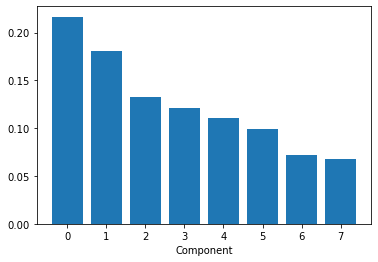

In [197]:
# Import matplotlib in order to plot some graphs + import of PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Use of PCA on our scaled features
pca = PCA()
pca.fit(scaled_train_features_3)

# The explained variance ratio retrieved from PCA
exp_variance_3 = pca.explained_variance_ratio_

# Barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance_3)
ax.set_xlabel('Component')

We run PCA on all our features at first, which is done by default if n_components is not specified.

This is a scree-plot, by using cumulative explained ratio plots to find the number of components (x-axis) to use in further analyses.

A Scree-plot displays the number of components against the variance explained by each component, sorted in descending order of variance. 

A Scree-plot helps us getting a better sense of which components explain a sufficient amount of variance in our data.

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> More Exploratory Analysis about PCA

We can notice an elbow from our previous scree-plot, for the component number 2. But it doesn't seem really clear, though.

As a bonus, in order to find the number of intrinsic dimensions, we can also check the cumulative explained variance plot, in order to define how many features can explain the variance. 

Once we determine the appropriate number of components, we are ready to perform PCA with the number indicated of components, that can lead to reduce the dimensionality of our data.

Here, we plot the cumulative explained variance of the PCA. For this, we use the cumulative sum function from numpy library : https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html

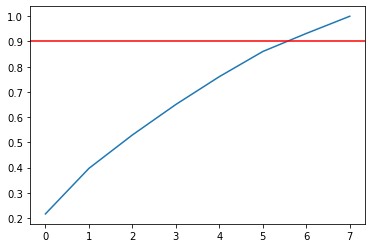

In [198]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance_3 = np.cumsum(exp_variance_3)

# Plot the cumulative explained variance and draw a dashed line at 0.85
fig, ax = plt.subplots()
ax.plot(cum_exp_variance_3)

# Add a y-axis to check for which components justifies 90% of the total variance
ax.axhline(y = 0.90, color = 'red')

With this graph, we can know how many features are required to justify 90% of the total variance, by crossing our y-axis with our cumulative variance. The answer is approximatively ~6 components are required (since we begin at 0, and the intersecation is for 5, so 6 components).

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Projecting the data to our features

Now, we know that approximately 6 features can explain 90% of the totale variance. 

The signification of this conclusion is that 4 components are sufficient to perform a good PCA and reduce the huge dimensionality of our train and test features.

We will perform a PCA with this chosen number of components, and project data onto those components:

In [199]:
# The chosen number of components
n_components = 6

# Perfom the PCA and project data onto components
pca = PCA(n_components, random_state = 10)

# We fit and transform the scaled training features using PCA
train_pca_3 = pca.fit_transform(scaled_train_features_3)

# We fit and transform the scaled test features using PCA
test_pca_3 = pca.transform(scaled_test_features_3)

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Train a Decision Tree to classify the countries

We are now ready to use this lower dimensional PCA projection of the data, in order to classify our users into countries.

Our Machine Learning model will be a Decision Tree. The principle of a Decision Tree is a rule-based classifier; it means that it takesin features and follow a tree structure composed of binary decisions, which finally classify a specific datapoint into one, or several categories. 

This model is the one we picked because it is for us the most "visual" model, it will be easier for us to interpret it, and manipulate it. But also by using the training data, the model will generate a logic flowchart aspect.

Now we can use the lower dimensional PCA projection of the data to classify our users into countries.

The library we will use to modelize our training is about the Decision tree Classifier : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [200]:
# Import the Decision tree classifier library
from sklearn.tree import DecisionTreeClassifier

# We train our decision tree
tree_3 = DecisionTreeClassifier(random_state = 10)

# Fit our tree with both train features & labels: we train it
tree_3.fit(train_pca_3, train_labels_3)

# We predict the labels for the test data
# We find the predicted labels of the test_pca from our trained model (using predict())
pred_labels_tree_3 = tree_3.predict(test_pca_3)

<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Logistic Regression

In order to be as rigorous as possible, we will not rely solely on the results of the decision tree model.

Another possible model we thought about is the Logistic Regression; it is possible that this model could be a better one. In order to conclude this, we will compare these two model results, after executing another algorithm using Logistic Regression model.

So why the Logistic Regression ? It is one of the first models we studied in class, and seems to be simpler than our previous one.

The Logistic Regression will compute the probability that a given data point belongs to a given class, thanks to the logistic function.

We will use the LogisticRegression library : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [201]:
# We first import the LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg_3 = LogisticRegression(random_state = 10)

# We train the model using fit
logreg_3.fit(train_features_3, train_labels_3)

# Our predicted labels thanks to logistic regression
pred_labels_logreg_3 = logreg_3.predict(test_features_3)

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> Comparison between two models : Decision Tree vs. Logistic Regression

We will now compare our two models on different measures, such as the rate of false positives and false negatives.
Also, the number of inaccurately classified points could be a good metric to evaluate our different models.

We will use the scikit learn metric library, and the function classification_report() : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [202]:
# We now create a classification report for our two models, in order to compare them
classification_tree_3 = classification_report(test_labels_3, pred_labels_tree_3)
classification_log_3 = classification_report(test_labels_3, pred_labels_logreg_3)

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/MaxiP

We got a WARNING message since some labels are not present in the testing set, but only in the training set and vice-versa.

In [203]:
# We finally print all our results to compare both models:
# Decision Tree
print("Decision Tree Model : \n", classification_tree_3)

Decision Tree Model : 
               precision    recall  f1-score   support

   Allemagne       0.00      0.00      0.00        14
   Australie       0.00      0.00      0.00         1
    Autriche       0.00      0.00      0.00         2
    Belgique       0.00      0.00      0.00         3
    Bulgarie       0.00      0.00      0.00         0
      Chypre       0.00      0.00      0.00         0
     Croatie       0.00      0.00      0.00         2
    Danemark       0.00      0.00      0.00         1
     Espagne       0.06      0.12      0.08         8
  Etats-Unis       0.11      0.06      0.07        18
    Finlande       0.00      0.00      0.00         1
      France       0.32      0.28      0.30        75
       Grèce       0.00      0.00      0.00         2
   Hong Kong       0.00      0.00      0.00         1
     Irlande       0.00      0.00      0.00         1
      Italie       0.16      0.20      0.18        46
    Lettonie       0.00      0.00      0.00         1
  L

In [204]:
print("confusion matrix of Decision Tree : ")
print(confusion_matrix(test_labels_3, pred_labels_tree_3))

confusion matrix of Decision Tree : 
[[ 0  0  0  0  0  0  0  0  0  2  0  5  0  0  0  4  0  1  0  1  1  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  1  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  3  0  0  0  2  0  0  0  0  1  1  0  0
   0  0  0]
 [ 2  0  0  0  0  0  0  0  2  1  0  3  0  0  0  6  0  0  0  0  0  0  1  0
   0  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 2  0  0  0  1 

In [205]:
# Logistic Regression
print("Logistic Regression Model : \n", classification_log_3)

Logistic Regression Model : 
               precision    recall  f1-score   support

   Allemagne       0.00      0.00      0.00        14
   Australie       0.00      0.00      0.00         1
    Autriche       0.00      0.00      0.00         2
    Belgique       0.00      0.00      0.00         3
    Bulgarie       0.00      0.00      0.00         0
     Croatie       0.00      0.00      0.00         2
    Danemark       0.00      0.00      0.00         1
     Espagne       0.00      0.00      0.00         8
  Etats-Unis       0.00      0.00      0.00        18
    Finlande       0.00      0.00      0.00         1
      France       0.35      0.65      0.45        75
       Grèce       0.00      0.00      0.00         2
   Hong Kong       0.00      0.00      0.00         1
     Irlande       0.00      0.00      0.00         1
      Italie       0.18      0.28      0.22        46
    Lettonie       0.00      0.00      0.00         1
  Luxembourg       0.00      0.00      0.00        

These results are computed thanks to the Confusion Matrix, which consists on a matrix as follows : 

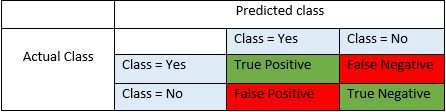
source : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. In our example, it describes the performance of our Decision Tree Classifier.

The four elements of the confusion matrix consist in :

- True Positive & True Negative which are observations correctly predicted, we want to maximize them:;
    - A True Positive: a correctly predicted positive value validating the fact that the actual class is YES and the predicted class is also YES (in our case, when a user comes from a country and our model predicts this country);
    - A True Negative: a correctly predicted negative value validating the fact that the actual class is NO and the predicted class is also NO (in our case, when a user doesn't come from a country and our model predicts that he is not from this country);
    
    
- False Positive & False Negative have to be minimized, since they are not well predicted observations ;
    - A False Positive: an uncorrect predicted positive value, when the actual class is NO and the predicted class is YES (in our case, when a user comes from a country and our model predicts another country);
    - A False Negative : an uncoreect predicted positive value, when the actual class is YES and the predicted class is NO (in our case, the opposite of the situation before);




Four important metrics have to be analyzed :

- The ACCURACY: it is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. Accuracy is a great measure, but only when we have symmetric datasets where values of false positive and false negatives are almost the same. Therefore, we have to look at other parameters to evaluate the performance of our model.


    - It is computed as follows : ACCURACY = (TP + TN) / (TP + FP + FN + TN)



- The PRECISION: it is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all users from a specific country, how many actually are from this country ? High precision relates to the low false positive rate.


    - It is computed as follows : PRECISION =  TP / (TP + FP)



- The RECALL (also known as Sensitivity): it is the ratio of correctly predicted positive observations to the all observations in actual class (or 'yes').


    - It is computed as follows : RECALL = TP / (TP + FN)
    
    
    
- The F1-SCORE: it is the weighted average of PRECISION and RECALL. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if we have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both PRECISION and RECALL.


    - It is computed as follows : F1-SCORE = 2 * (RECALL * PRECISION) / (RECALL + PRECISION)










To understand well this report, we have to notice that : 
- the reported averages include macro average (which stands for averaging the unweighted mean per label); 
- the weighted average stands for averaging the support-weighted mean per label);
- the sample average is only for multilabel classification); 

Our two models work finally. We have a lot to compare, since we registered as labels all the countries of each customer of our marketplace !

By looking at all the classification report, we can first notice that the weighted average precision of both models are really low ... 0.17% for Decision Tree, and 0.16% for Logistic Regression. 

This can be explained by the huge amount of countries which are in a really small number, in comparison with countries such as France, United States, etc. These countries are well classified, but others such as Luxembourg, Finland are disproportionaly misclassified.

This can be explained by just looking at the number of data points for each class. We have more data points for the France or Italy classifications than Singapour.

We can also conclude that most of the accuracy of our model is determined by its ability to classify only French or American clients, which is less than ideal.

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Optimize our models

So we will first filter the countries, and keep only the most represented, those that can be considered to elect our best marketplace, which are : France, Italy, United Kingdom and United States of America.

In [206]:

#df_top = df_seg.loc[]
df_top = df_seg.loc[df_seg['country'].isin(['France', 'Etats-Unis', 'Italie', 'Royaume-Uni'])]

df_opti = df_top.loc[df_top['clusters'] == 1]

df_opti['country'].value_counts()

France         269
Italie         194
Royaume-Uni    119
Etats-Unis      58
Name: country, dtype: int64

In [207]:
# Creation of the features set

features_o = df_opti.drop(['identifierHash', 'type', 'country', 'language', 'gender', 'civilityTitle','socialNbFollowers', 'socialNbFollows', 'hasAnyApp', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'countryCode', 'civilityGenderId', 'seniorityAsMonths', 'seniorityAsYears', 'clusters'], axis = 1).values

features_o

array([[1.300e+01, 2.500e+01, 4.300e+01, ..., 0.000e+00, 1.100e+01,
        3.195e+03],
       [0.000e+00, 2.300e+01, 4.300e+01, ..., 0.000e+00, 1.100e+01,
        3.203e+03],
       [5.440e+02, 8.200e+01, 4.100e+01, ..., 9.000e+00, 1.100e+01,
        2.856e+03],
       ...,
       [0.000e+00, 0.000e+00, 2.000e+00, ..., 0.000e+00, 5.850e+02,
        2.853e+03],
       [0.000e+00, 1.000e+00, 2.000e+00, ..., 0.000e+00, 1.830e+02,
        2.852e+03],
       [5.000e+00, 3.000e+00, 1.000e+00, ..., 0.000e+00, 2.360e+02,
        3.203e+03]])

In [208]:
features_o.shape[0]

640

In [209]:
# Creation of the labels

labels_o = df_opti['country'].values

labels_o


array(['Italie', 'France', 'Italie', 'Royaume-Uni', 'France',
       'Royaume-Uni', 'Italie', 'France', 'Italie', 'Italie', 'Italie',
       'Italie', 'France', 'Italie', 'France', 'France', 'Royaume-Uni',
       'Italie', 'Italie', 'Italie', 'Royaume-Uni', 'Royaume-Uni',
       'Royaume-Uni', 'Italie', 'Italie', 'France', 'Italie', 'Italie',
       'France', 'Italie', 'Royaume-Uni', 'Royaume-Uni', 'Italie',
       'Italie', 'Italie', 'Royaume-Uni', 'Italie', 'Italie',
       'Royaume-Uni', 'Italie', 'Italie', 'France', 'France', 'France',
       'France', 'Italie', 'Royaume-Uni', 'Royaume-Uni', 'Italie',
       'France', 'France', 'France', 'Italie', 'France', 'France',
       'Royaume-Uni', 'Royaume-Uni', 'Italie', 'Italie', 'Italie',
       'Italie', 'France', 'Italie', 'Italie', 'Italie', 'France',
       'Italie', 'Royaume-Uni', 'Italie', 'Italie', 'Italie', 'France',
       'Italie', 'Italie', 'France', 'France', 'Italie', 'Italie',
       'Italie', 'Italie', 'France', 'France', 

In [210]:
labels_o.shape[0]

640

In [211]:
# Import of the train_test_split function
from sklearn.model_selection import train_test_split

# We finally split the data
train_features_o, test_features_o, train_labels_o, test_labels_o = train_test_split(features_o, labels_o, random_state = 10)


In [212]:
train_labels_o

array(['France', 'France', 'France', 'Italie', 'Royaume-Uni', 'France',
       'France', 'Italie', 'France', 'Royaume-Uni', 'Etats-Unis',
       'Etats-Unis', 'Etats-Unis', 'Royaume-Uni', 'France', 'Italie',
       'Royaume-Uni', 'Royaume-Uni', 'Royaume-Uni', 'Royaume-Uni',
       'France', 'Royaume-Uni', 'Royaume-Uni', 'Italie', 'Italie',
       'France', 'France', 'Etats-Unis', 'France', 'France',
       'Royaume-Uni', 'France', 'Etats-Unis', 'France', 'Italie',
       'Royaume-Uni', 'Italie', 'Etats-Unis', 'Etats-Unis', 'France',
       'France', 'France', 'Italie', 'France', 'France', 'France',
       'France', 'France', 'France', 'Italie', 'France', 'Italie',
       'France', 'Italie', 'France', 'Etats-Unis', 'France', 'Italie',
       'France', 'Italie', 'France', 'Italie', 'Italie', 'France',
       'Royaume-Uni', 'Etats-Unis', 'Italie', 'Italie', 'France',
       'France', 'Italie', 'France', 'Italie', 'France', 'Italie',
       'Italie', 'Royaume-Uni', 'Italie', 'France', 'Fra

In [213]:
test_labels_o

array(['Italie', 'France', 'Royaume-Uni', 'France', 'France', 'France',
       'Italie', 'Italie', 'Italie', 'France', 'Italie', 'France',
       'France', 'France', 'Royaume-Uni', 'Italie', 'Royaume-Uni',
       'Royaume-Uni', 'France', 'Italie', 'Italie', 'France',
       'Royaume-Uni', 'France', 'Italie', 'France', 'Italie', 'Italie',
       'Italie', 'Italie', 'France', 'Royaume-Uni', 'Italie', 'Italie',
       'Royaume-Uni', 'France', 'France', 'France', 'Italie', 'France',
       'Royaume-Uni', 'France', 'Royaume-Uni', 'Italie', 'France',
       'Italie', 'Italie', 'Italie', 'Italie', 'France', 'Italie',
       'Royaume-Uni', 'France', 'France', 'France', 'France', 'France',
       'Italie', 'Royaume-Uni', 'Royaume-Uni', 'France', 'Royaume-Uni',
       'France', 'France', 'Italie', 'Royaume-Uni', 'France',
       'Royaume-Uni', 'Royaume-Uni', 'France', 'Italie', 'Royaume-Uni',
       'France', 'Italie', 'Italie', 'Etats-Unis', 'Italie', 'France',
       'France', 'France', 'Itali

In [214]:
# Import of the StandardScaler
from sklearn.preprocessing import StandardScaler

# Creation of an instance of the StandardScaler, we call it scaler
scaler = StandardScaler()

# We scale the train_features by using fit_transform
scaled_train_features_o = scaler.fit_transform(train_features_o)

# We then scale the test feature, with transform
scaled_test_features_o = scaler.transform(test_features_o)

Text(0.5, 0, 'Component')

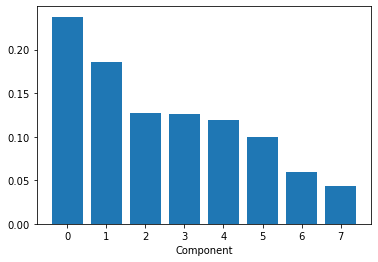

In [215]:
# Import matplotlib in order to plot some graphs + import of PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Use of PCA on our scaled features
pca = PCA()
pca.fit(scaled_train_features_o)

# The explained variance ratio retrieved from PCA
exp_variance_o = pca.explained_variance_ratio_

# Barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance_o)
ax.set_xlabel('Component')

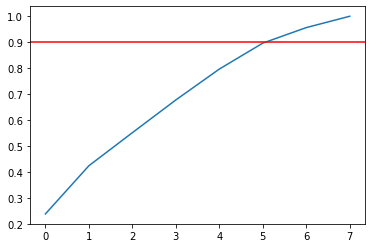

In [216]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance_o = np.cumsum(exp_variance_o)

# Plot the cumulative explained variance and draw a dashed line at 0.85
fig, ax = plt.subplots()
ax.plot(cum_exp_variance_o)

# Add a y-axis to check for which components justifies 90% of the total variance
ax.axhline(y = 0.90, color = 'red')

In [217]:
# The chosen number of components
n_components = 6

# Perfom the PCA and project data onto components
pca = PCA(n_components, random_state = 10)

# We fit and transform the scaled training features using PCA
train_pca_o = pca.fit_transform(scaled_train_features_o)

# We fit and transform the scaled test features using PCA
test_pca_o = pca.transform(scaled_test_features_o)

In [218]:
# Import the Decision tree classifier library
from sklearn.tree import DecisionTreeClassifier

# We train our decision tree
tree_o = DecisionTreeClassifier(random_state = 10)

# Fit our tree with both train features & labels: we train it
tree_o.fit(train_pca_o, train_labels_o)

# We predict the labels for the test data
# We find the predicted labels of the test_pca from our trained model (using predict())
pred_labels_tree_o = tree_o.predict(test_pca_o)

In [219]:
# We first import the LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg_o = LogisticRegression(random_state = 10, max_iter = 10000)

# We train the model using fit
logreg_o.fit(train_features_o, train_labels_o)

# Our predicted labels thanks to logistic regression
pred_labels_logreg_o = logreg_o.predict(test_features_o)

In [220]:
# We use the scikit-learn metric "classification_report()" function
from sklearn.metrics import classification_report

# We now create a classification report for our two models, in order to compare them
classification_tree_o = classification_report(test_labels_o, pred_labels_tree_o)
classification_log_o = classification_report(test_labels_o, pred_labels_logreg_o)

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We still have a WARNING message for our LogisticRegression method; since we mainly want to see results with the Decision Tree Classifier and use Logistic Regression as a comparison model, we continued.

In [221]:
# We finally print all our results to compare both models:
# Decision Tree
print("Decision Tree Model : \n", classification_tree_o)

Decision Tree Model : 
               precision    recall  f1-score   support

  Etats-Unis       0.11      0.40      0.17         5
      France       0.45      0.43      0.44        67
      Italie       0.42      0.36      0.39        58
 Royaume-Uni       0.26      0.23      0.25        30

    accuracy                           0.37       160
   macro avg       0.31      0.36      0.31       160
weighted avg       0.39      0.37      0.38       160



In [222]:
# Logistic Regression
print("Logistic Regression Model : \n", classification_log_o)

Logistic Regression Model : 
               precision    recall  f1-score   support

  Etats-Unis       0.00      0.00      0.00         5
      France       0.43      0.78      0.55        67
      Italie       0.44      0.29      0.35        58
 Royaume-Uni       0.00      0.00      0.00        30

    accuracy                           0.43       160
   macro avg       0.22      0.27      0.23       160
weighted avg       0.34      0.43      0.36       160



To understand well this report, we have to notice that : 
- the reported averages include macro average (which stands for averaging the unweighted mean per label); 
- the weighted average ( which stands for averaging the support-weighted mean per label);
- the sample average (which is only for multilabel classification); 

We still have some bad numbers ... But at least it is more clear, with all the best countries we can evaluate as which one could be the best marketplace.

We have now a precision of 0.39% for Decision Tree, and 0.34% for Logistic Regression.

We can also confirm that the Decision Tree seems to be the best model.

But there is still too much differences between datapoints for each country.


We will therefore "resample" the countries, so that the distribution of datapoints is less unequal.


In [223]:
# We first have to subset all our countries
france = df_opti.loc[df_opti["country"] == "France"]
usa = df_opti.loc[df_opti["country"] == "Etats-Unis"]
uk = df_opti.loc[df_opti["country"] == "Royaume-Uni"]
italy = df_opti.loc[df_opti["country"] == "Italie"]

# We sample the French, American, Italian users to be the same number as there are British datapoints
france = france.sample(n = usa.shape[0], random_state = 10)
uk = uk.sample(n = usa.shape[0], random_state = 10)
italy = italy.sample(n = usa.shape[0], random_state = 10)

# We concatenate all the dataframes together
countries_concat = pd.concat([france, usa, uk, italy])

# We have created a balanced dataframe; we perform as previously all the step to fit & transform
features_f = countries_concat.drop(['identifierHash', 'type', 'country', 'language', 'gender', 'civilityTitle', 'socialNbFollowers', 'socialNbFollows', 'hasAnyApp', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'countryCode', 'socialNbFollows', 'socialProductsLiked', 'civilityGenderId', 'seniorityAsMonths', 'seniorityAsYears', 'clusters'], axis=1)
labels_f = countries_concat['country'].values
pca_projection_f = pca.fit_transform(scaler.fit_transform(features_f))

# We apply as before our train & test sets, with the PCA
train_features_f, test_features_f, train_labels_f, test_labels_f = train_test_split(features_f, labels_f, random_state=10)

# We finally fit and transform both train and test sets
train_pca_f = pca.fit_transform(scaler.fit_transform(train_features_f))
test_pca_f = pca.transform(scaler.transform(test_features_f))

Now that we have calibrated and adjusted our dataset, giving an equal number of datapoints to each country, we can start running our models, as above.

The major problem we may encounter is that by removing several datapoints, we have probably removed data that is essential to training our machine learning models. 


We will now compare the metrics of our two new models, based on our new balanced data :


In [224]:
# We train our decision tree
tree_f = DecisionTreeClassifier(random_state=10)

# Fit our tree with both train features & labels: we train it
tree_f.fit(train_pca_f, train_labels_f)

# We predict the labels for the test data
# We find the predicted labels of the test_pca from our trained model (using predict())
pred_labels_tree_f = tree_f.predict(test_pca_f)

#############

# Train our logistic regression and predict labels for the test set
logreg_f = LogisticRegression(random_state=10)

# We train the model using fit
logreg_f.fit(train_pca_f, train_labels_f)

# Our predicted labels thanks to logistic regression
pred_labels_logreg_f = logreg_f.predict(test_pca_f)


In [225]:
# 
classification_tree_f = classification_report(test_labels_f, pred_labels_tree_f)

classification_log_f = classification_report(test_labels_f, pred_labels_logreg_f)


In [226]:
# We finally print all our results to compare both models:
# Decision Tree
print("Decision Tree Model (balanced data): \n", classification_tree_f)

Decision Tree Model (balanced data): 
               precision    recall  f1-score   support

  Etats-Unis       0.33      0.36      0.34        14
      France       0.38      0.33      0.36        15
      Italie       0.31      0.36      0.33        14
 Royaume-Uni       0.50      0.47      0.48        15

    accuracy                           0.38        58
   macro avg       0.38      0.38      0.38        58
weighted avg       0.38      0.38      0.38        58



In [227]:
# Logistic Regression

print("Logistic Regression Model (balanced data): \n", classification_log_f)

Logistic Regression Model (balanced data): 
               precision    recall  f1-score   support

  Etats-Unis       0.25      0.29      0.27        14
      France       0.33      0.20      0.25        15
      Italie       0.40      0.57      0.47        14
 Royaume-Uni       0.46      0.40      0.43        15

    accuracy                           0.36        58
   macro avg       0.36      0.36      0.35        58
weighted avg       0.36      0.36      0.35        58



To understand well this report, we have to notice that : 
- the reported averages include macro average (which stands for averaging the unweighted mean per label); 
- the weighted average ( which stands for averaging the support-weighted mean per label);
- the sample average (which is only for multilabel classification); 




    * The f1-score accuracy is 0.38 for Decision Tree Classifier and 0.36 for Logistic Regression.

    * The average precision of both models is still really low, 0.36-0.38 is a bad precision percent ...

<h1 style= 'color: lightgreen; background: navy 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 25px; font-weight: bold'> Cross-validation and conclusion

Finally, we can agree on the fact that our data has removed some bias, just by seeing that our percentages are now more coherent (almost similar percentages).

But there are still low. The question we can ask is that the perfect classification for a country doesn't exist, or at least we can predict the least worst between all of these countries, which the United Kingdom, following the F1-score.

To validate our models and their performances, we can apply a cross-validation. We can compare both models with concrete numbers computed.

First, we need to create a pipeline to be more efficient, about our previous steps : scale the data, perform a PCA on it, and then instantiate the models.

Here is where we found informations about the pipeline from scikitlearn package : https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [228]:
# Import of the pipeline from scikitlearn
from sklearn.pipeline import Pipeline

# Creation of a pipeline for our model DECISION TREE
tree_pipeline = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), ("tree", DecisionTreeClassifier(random_state=10))])

# Creation of a pipeline for our model LOGISTIC REGRESSION
logreg_pipeline = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), ("logreg", LogisticRegression(random_state=10))])



One specific method of cross-validation is the K-fold CV. 

It works as follows: The method first divides the data into K different subsets, but which are of equal size. Then, each subset will serve one after the other as a test set, and the remaining subsets serve as training data. The results are finally evaluated together to give a final score on the performance of our model. It will be used to compare the decision tree and the logistic regression.

We searched about it on this page : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html


In [229]:
# Import of the KFold function from scikitlearn
from sklearn.model_selection import KFold

# We set-up the KFold function, with the parameter 10 for 10 different folds created during the process
kfold = KFold(10)



Finally, we apply the cross_val_score() method to obtain the respective scores of the two models (here is the source of the function use : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score )

In [230]:
# Import of the cross_val_score function from scikitlearn
from sklearn.model_selection import cross_val_score

# We compute the cross-validation score for both models
tree_score = cross_val_score(tree_pipeline, features_f, labels_f, cv = kfold, scoring = 'accuracy')
logreg_score = cross_val_score(logreg_pipeline, features_f, labels_f, cv = kfold, scoring = 'accuracy')


Here are our cross-validations scores for Decision Tree & Logistic Regression :

In [231]:
# CV score for Decision Tree
print("Decision Tree CV accuracy score : ", tree_score.mean()) 

Decision Tree CV accuracy score :  0.2721014492753623


In [232]:
print("confusion matrix of Decision Tree : ")
print(confusion_matrix(test_labels_f, pred_labels_tree_f))

confusion matrix of Decision Tree : 
[[5 4 5 0]
 [5 5 2 3]
 [3 2 5 4]
 [2 2 4 7]]


In [233]:
# CV score for Logistic Regression
print("Logistic Regression CV accuracy score : ", logreg_score.mean())

Logistic Regression CV accuracy score :  0.15217391304347827


In [234]:
print("confusion matrix of Logistic Regression : ")
print(confusion_matrix(test_labels_f, pred_labels_logreg_f))

confusion matrix of Logistic Regression : 
[[4 2 7 1]
 [5 3 3 4]
 [2 2 8 2]
 [5 2 2 6]]


<h2 style= 'color: magenta; background: lavender 50%; text-align: center; padding: 15px; border-radius: 10px; font-size: 17px; font-weight: bold'> CONCLUSION

Now that we have acheived our cross-validations, we can be pretty sure, by looking at the percentage of accuracy score of the Decision Tree (0.27) that our model will generalize 27% of the times on the future unseen data points.

The Cross-Validation is our final step, because it is the most important one when we have to validate a Machine Learning model.

Its principle is about trying to leave a sample on which we do not train the model, and test the model on this sample before finalizing the model.

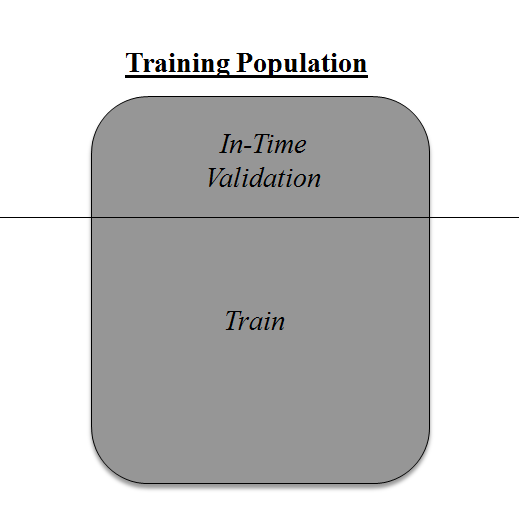
source : https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/?utm_source=blog&utm_medium=decision-tree-vs-random-forest-algorithm

By looking at the diagram, we will validate the model with in-time sample. We simply divide the population into 2 samples, and build model on one sample. Rest of the population is used for in-time validation.

With the K-Fold method, it is the same principle but with 10 different folds, so this case but 10 times.

Our Dataset is really harsh to predict and classify users in their corresponding country, according to the user metrics. The cross-validation score says it all.

Our two prediction models are not adapted to our case, and it will be better to work on other models, at least for this specific question. 

For this, we thought about a Random Forrest Classifier, keeping the same logic as in our individual homework with house pricing in California, in this case it was regression. The Random Forrest is a more complex model, in comparison with Decision Tree. We wanted to stay in a simpler model, in order to be able to interpret it easily.

Hence, for the previous questions, we used both Decision Tree & Random Forest Classifiers.